In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
import numpy as np
from numpy import arccos
from utils import get_pulsars

from scipy.interpolate import interp1d
from numpy import loadtxt
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels

plt.rcParams.update({'font.size': 15})

Cannot import PINT? Meh...
Do not have acor package


In [2]:
psrs = get_pulsars()

Reading pulsars from cached file.



In [3]:
tmin = [p.toas.min() for p in psrs]
tmax = [p.toas.max() for p in psrs]
Tspan = np.max(tmax) - np.min(tmin)
fmin = 1/Tspan
nmodes = 50
fmax = nmodes*fmin

In [4]:
p1 = psrs[0]
p2 = psrs[2]

In [5]:
def get_psr_pair_info(p1, p2):
    if p1 == p2:
        xi = 0.0
    else:
        cosxi = np.dot(p1.pos, p2.pos)
        xi = arccos(cosxi)
    
    # distance is in units of kpc
    L1 = p1.pdist[0]
    L2 = p2.pdist[0]
    if L1 < L2:
        L1, L2 = L2, L1
    return xi, L1, L2

p1 = psrs[0]
p2 = psrs[1]
get_psr_pair_info(p1, p1)

(0.0, 1.6, 1.6)

In [6]:
prs_pair_info = open('backup/prs_pair_info.txt','w')
N_psr = len(psrs)
for i in range(0, N_psr):
    for j in range(i, N_psr): 
        xi, L1, L2 = get_psr_pair_info(psrs[i], psrs[j])
        prs_pair_info.writelines(f"{xi} {L1} {L2}\n")
prs_pair_info.close()

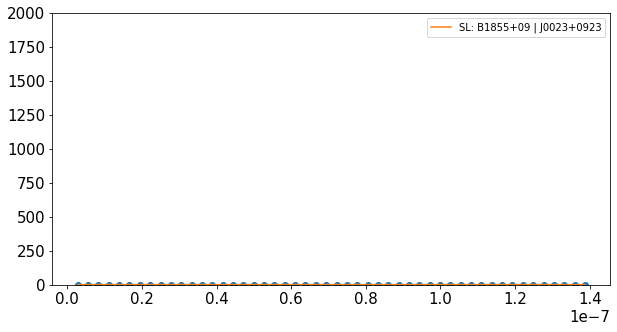

In [9]:
def plotPair(polar, p1, p2):
    xi, L1, L2 = get_psr_pair_info(p1, p2) 
    fileName = f"backup/{polar}_{xi}_{L1}_{L2}.txt"
    data = loadtxt(fileName, comments="#")
    x = data[:, 0]
    y = data[:, 1]
    
    x2 = np.linspace(x[0], x[-1], num=500)
    f2 = interp1d(x, y, kind='cubic')
    y2 = f2(x2)
    
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, "o")
    plt.plot(x2, y2, label=f"{polar}: {p1.name} | {p2.name}")
    plt.ylim(-1e0, 2e3)
    plt.legend()
#     plt.yscale("log")
    plt.show()
    
    
plotPair("SL", psrs[0], psrs[1])

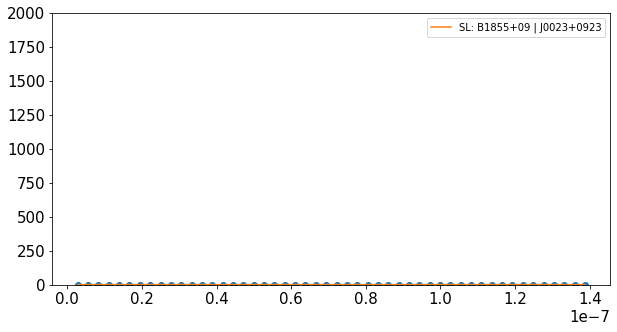

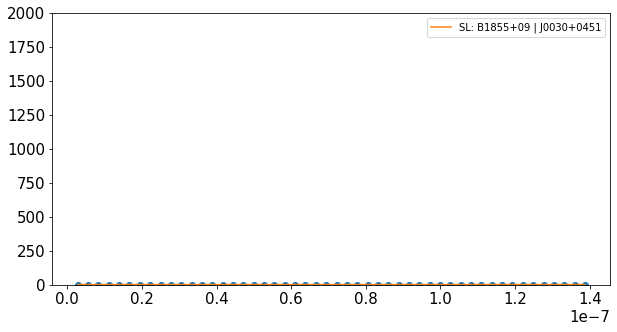

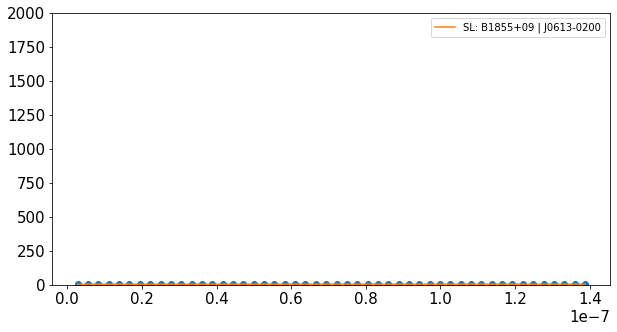

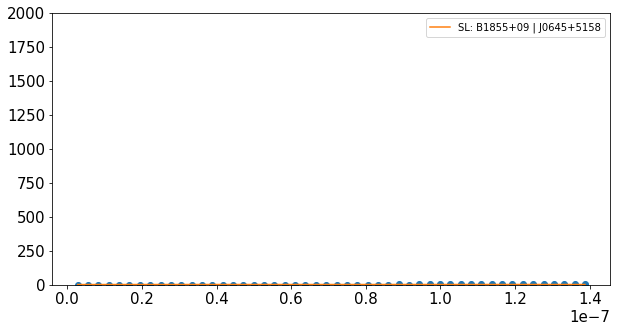

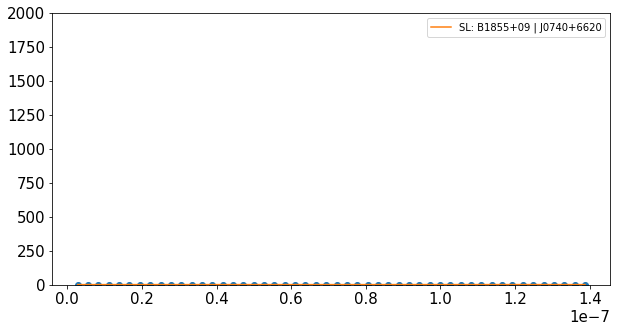

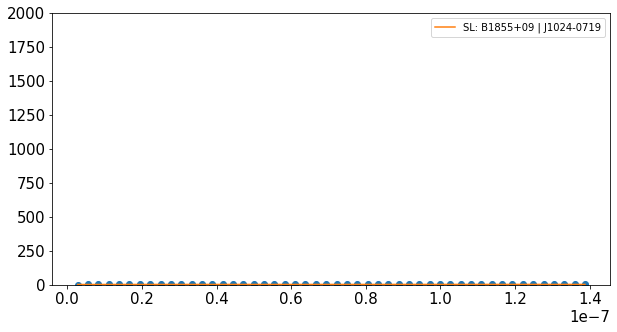

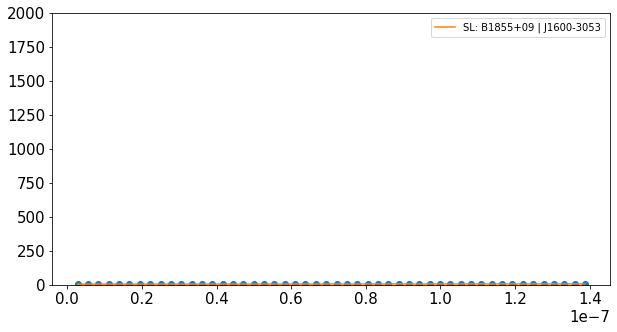

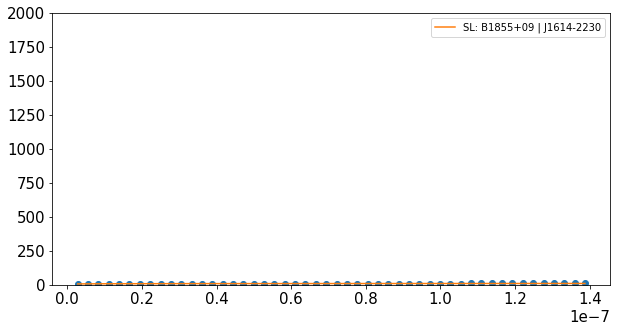

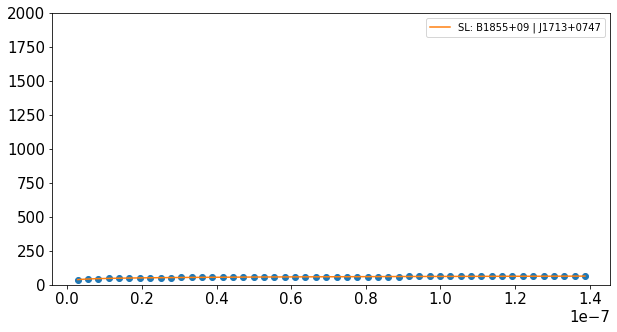

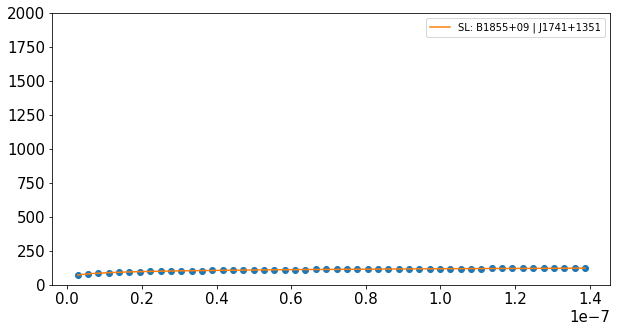

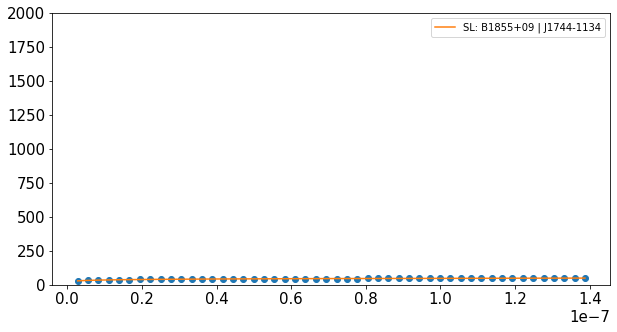

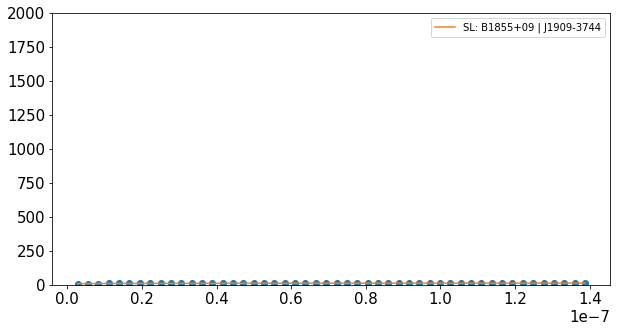

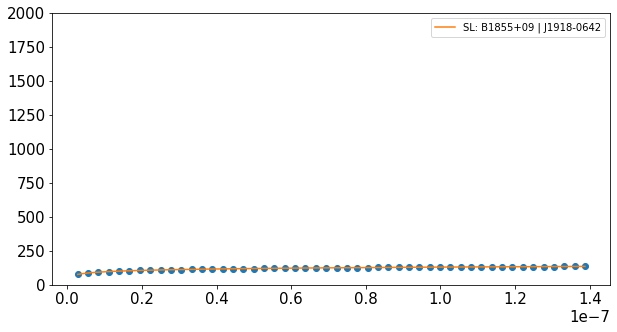

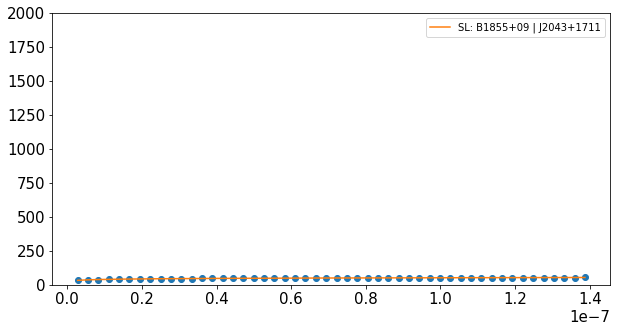

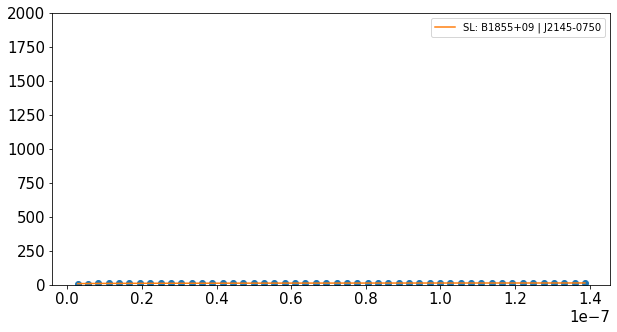

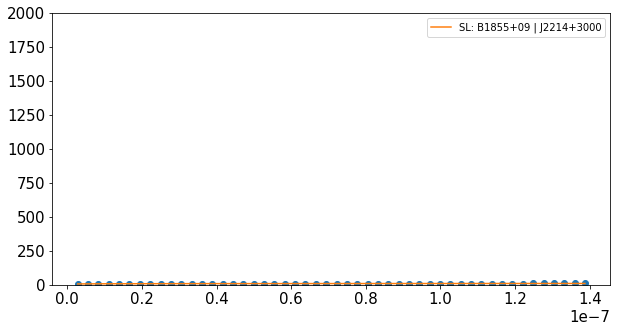

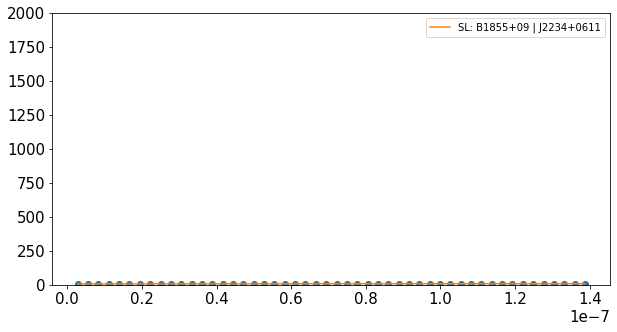

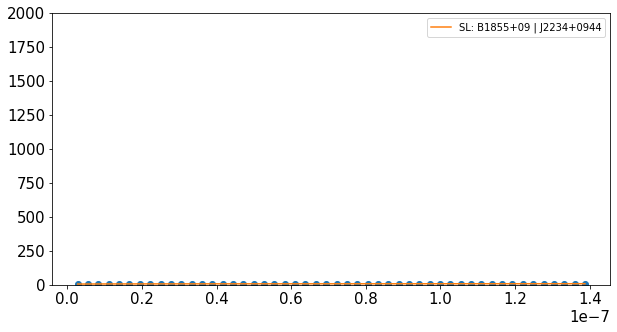

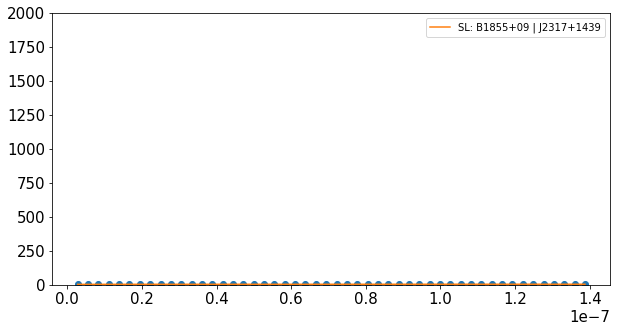

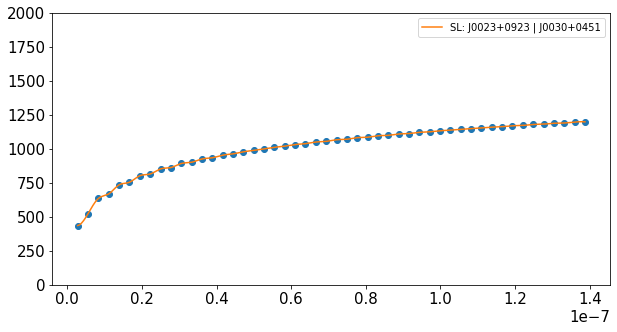

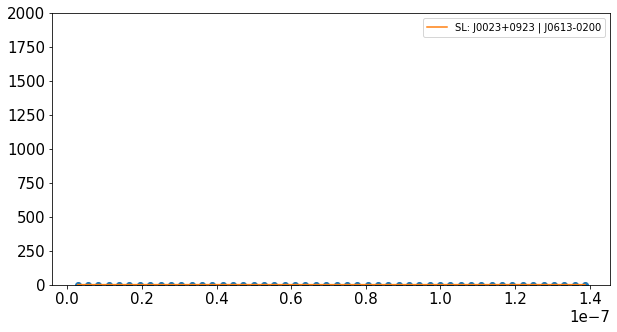

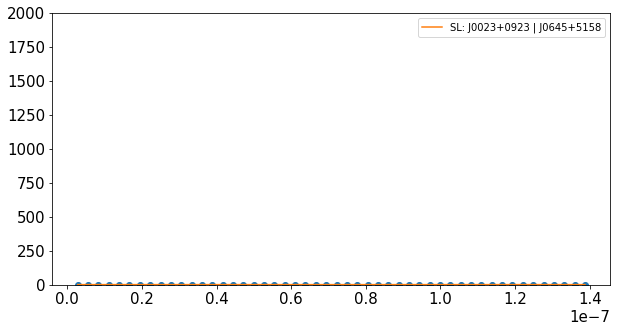

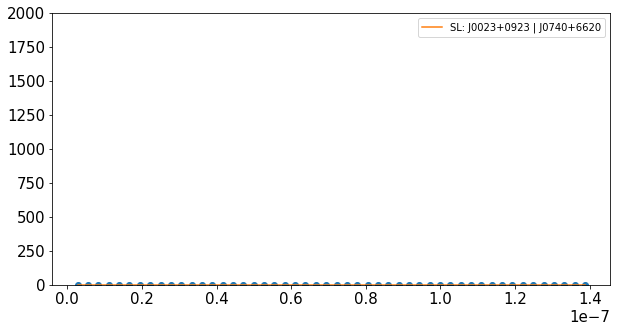

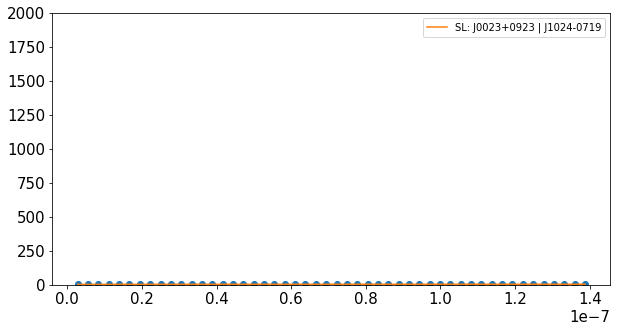

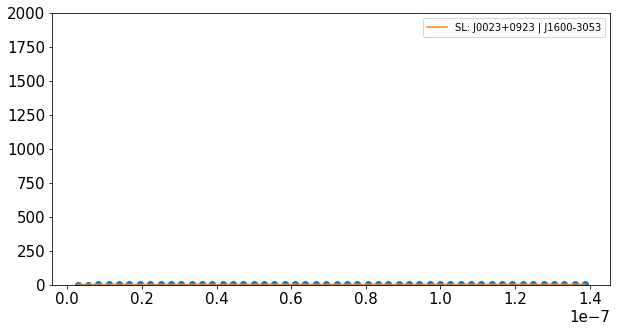

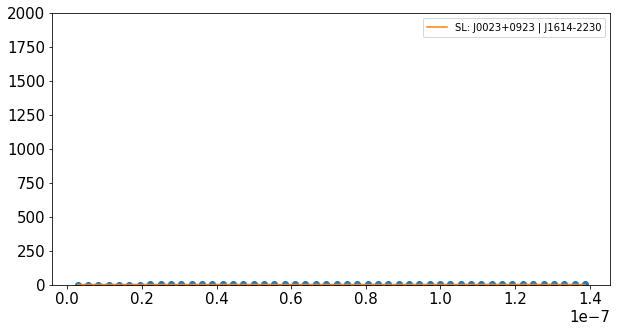

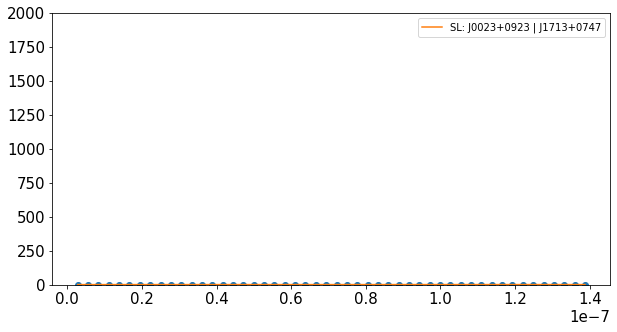

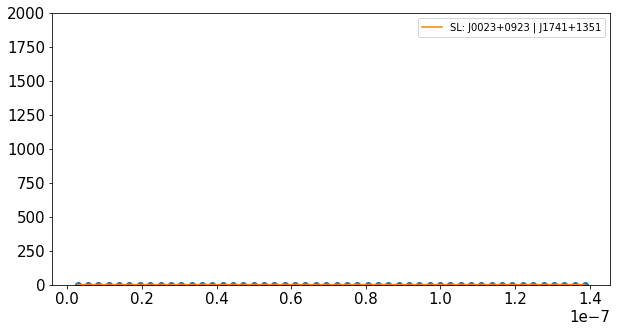

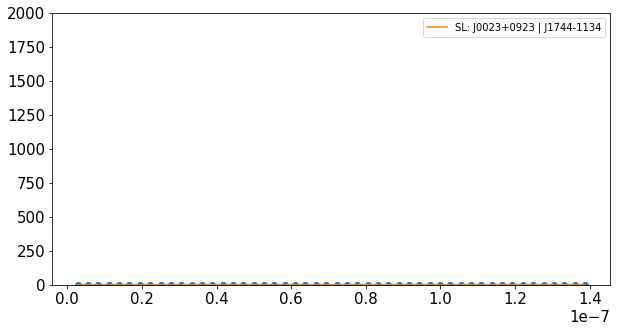

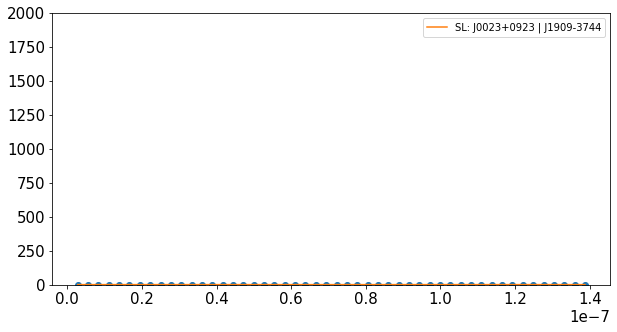

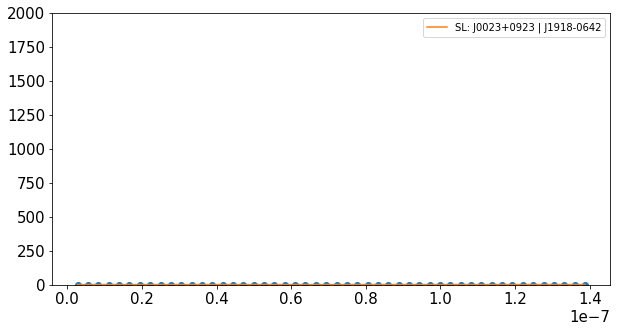

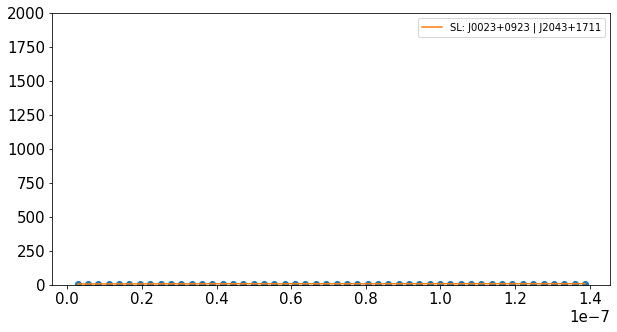

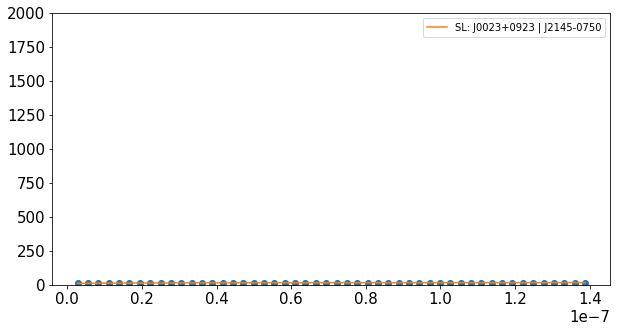

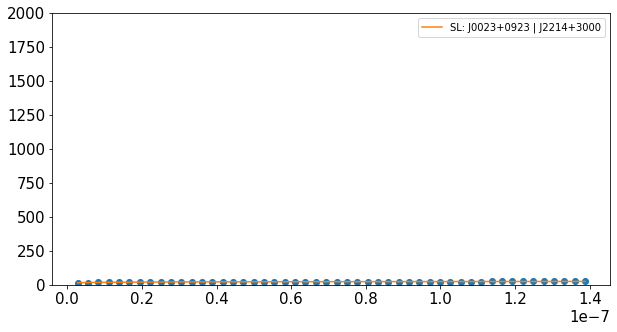

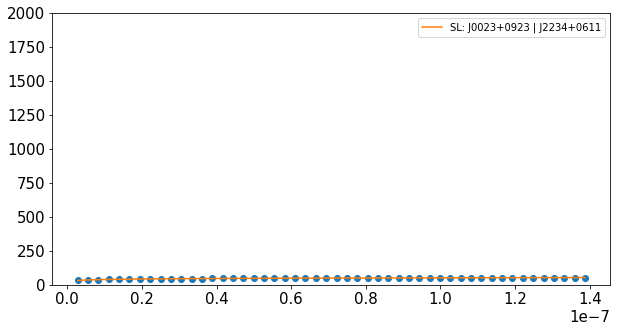

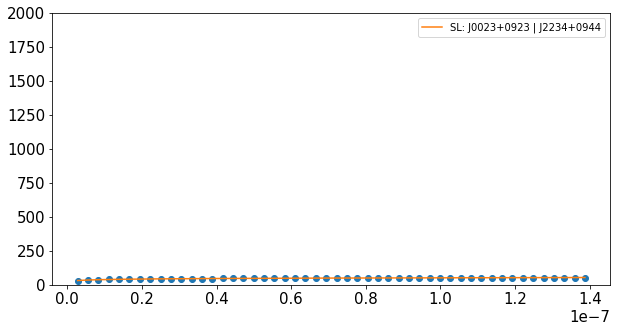

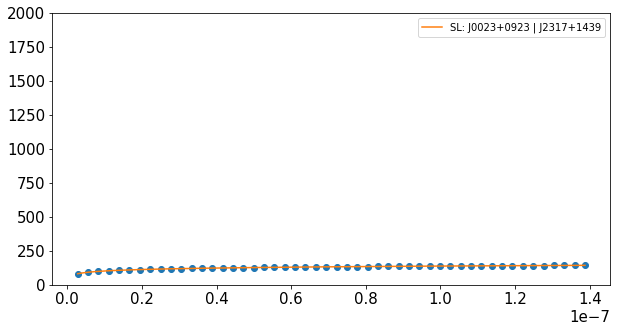

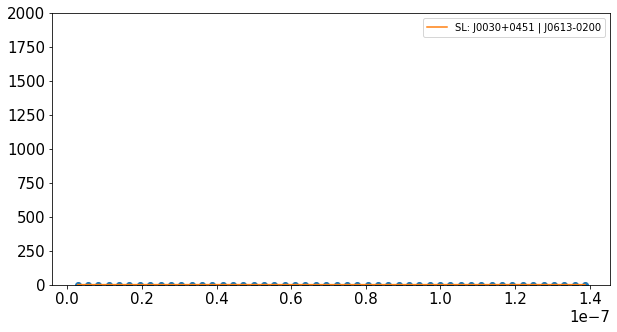

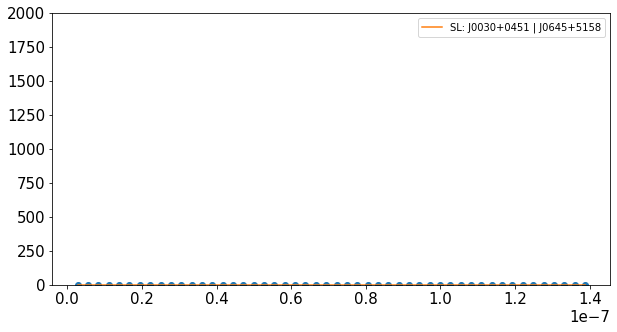

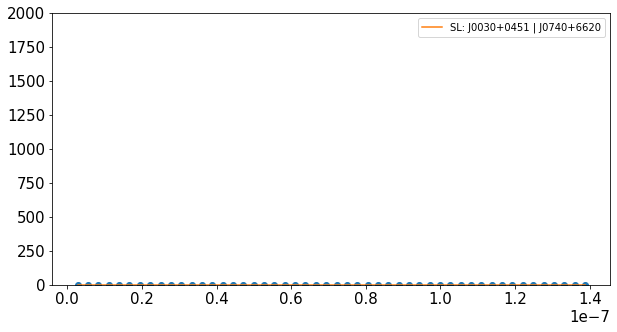

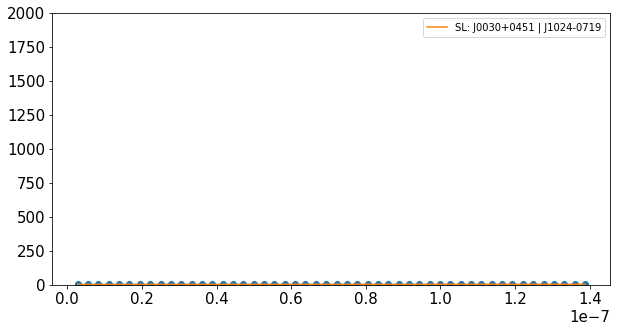

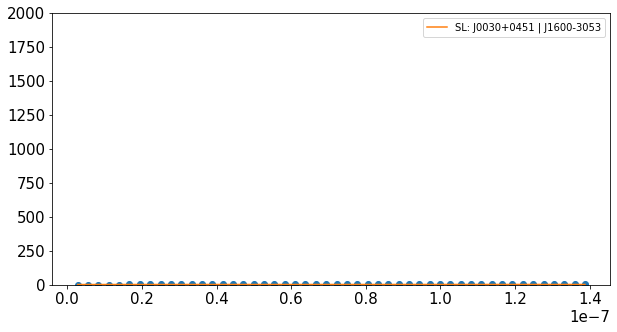

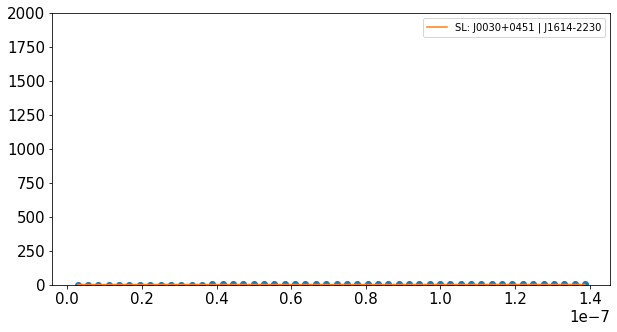

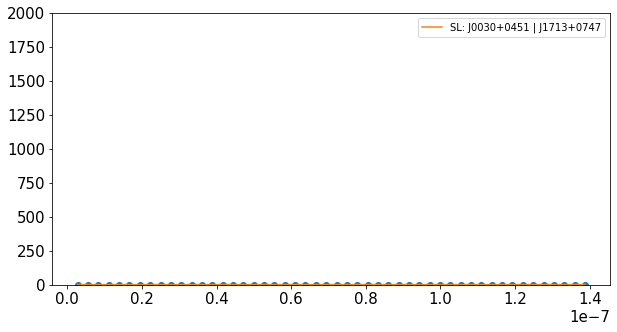

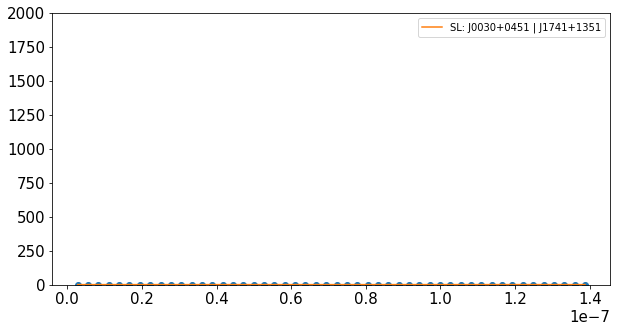

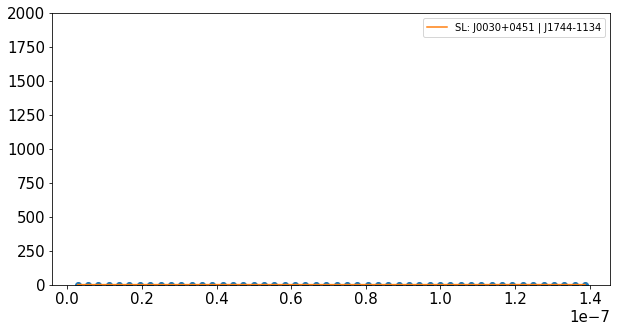

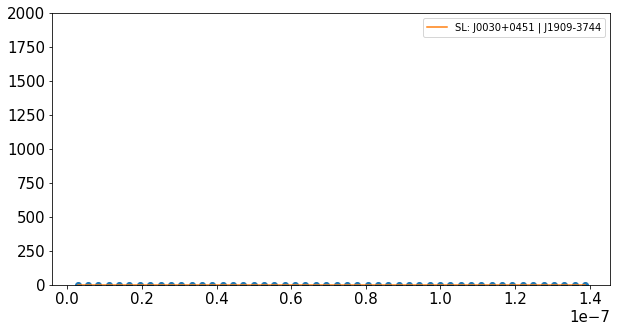

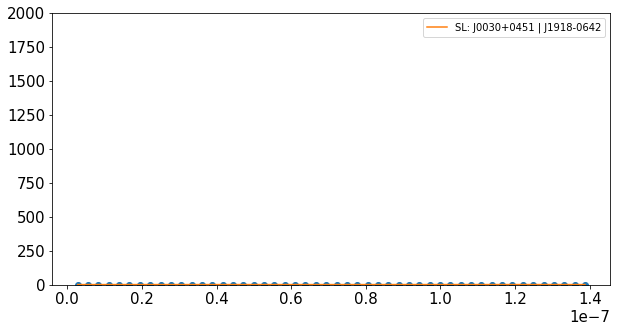

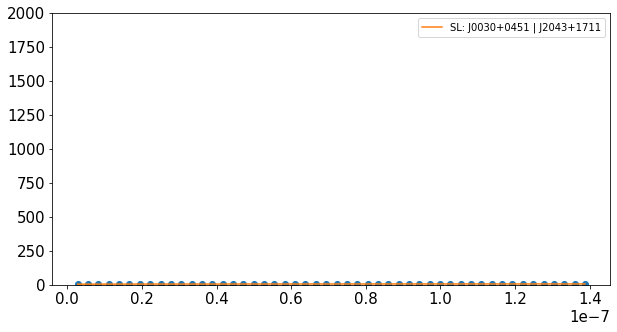

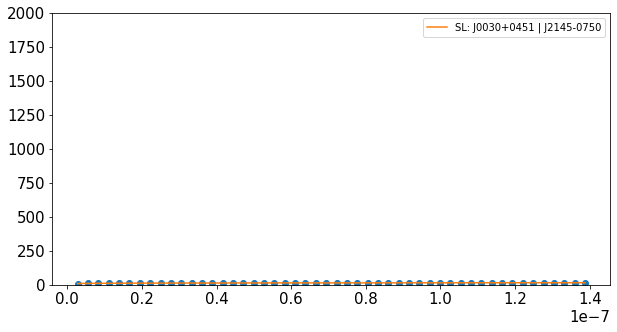

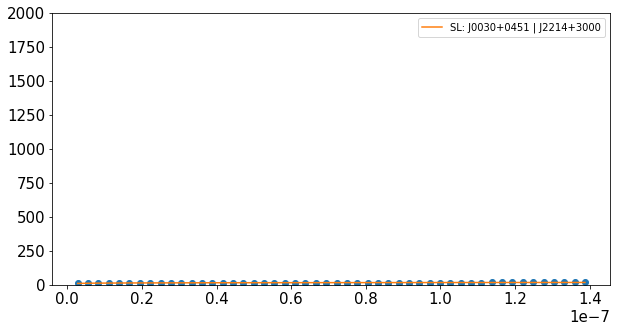

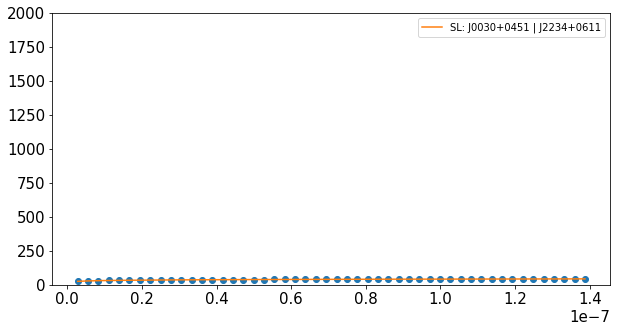

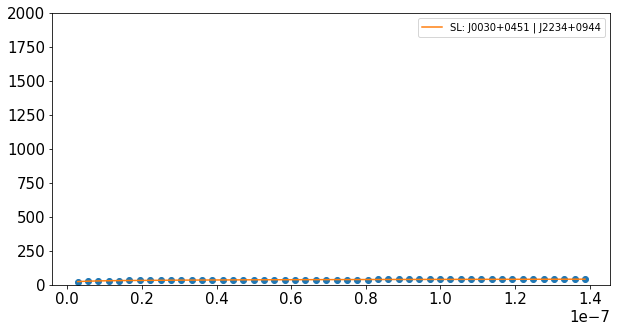

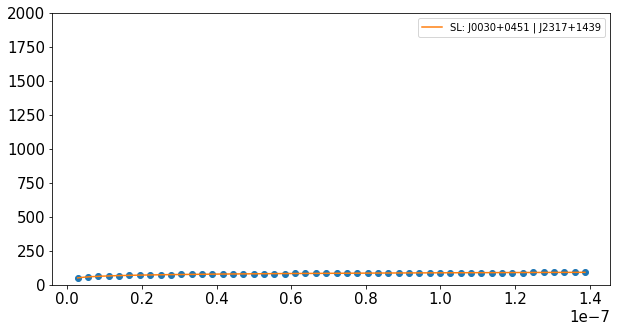

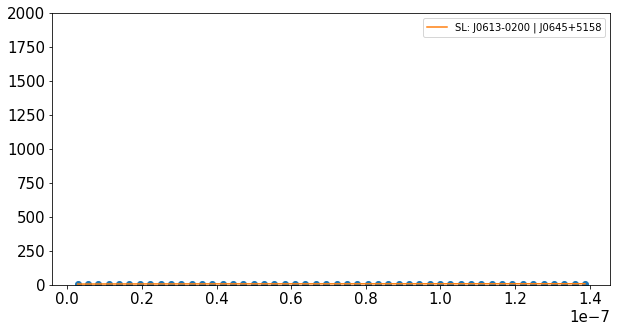

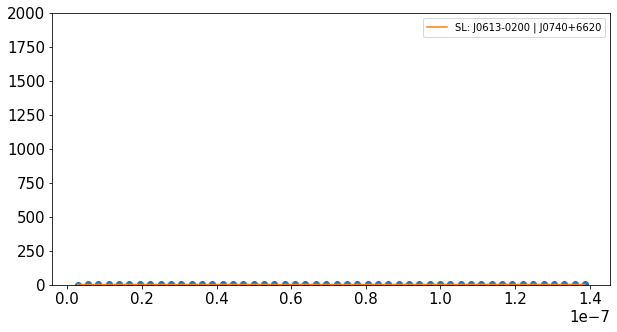

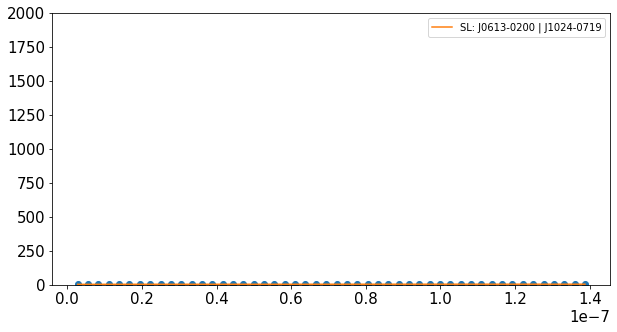

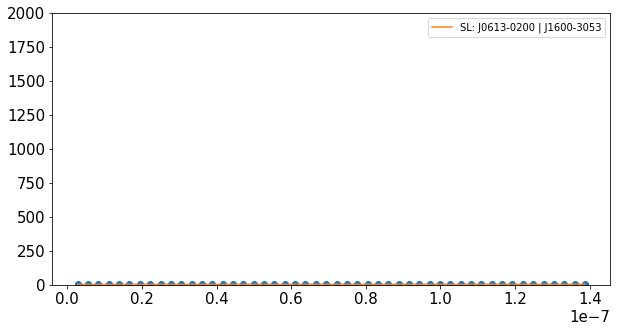

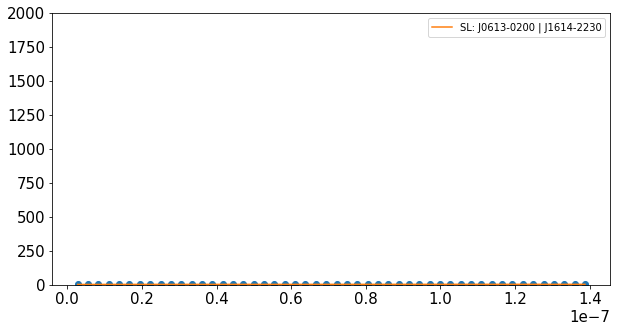

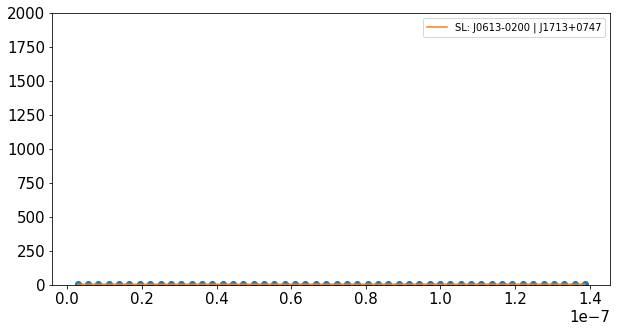

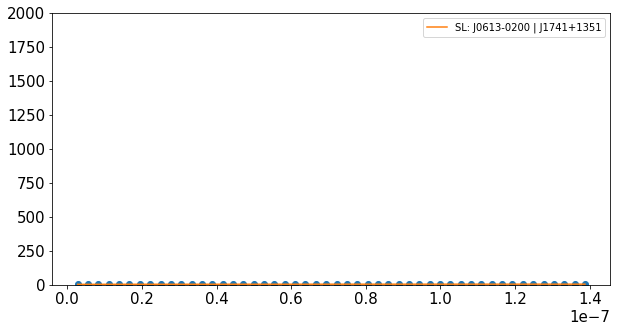

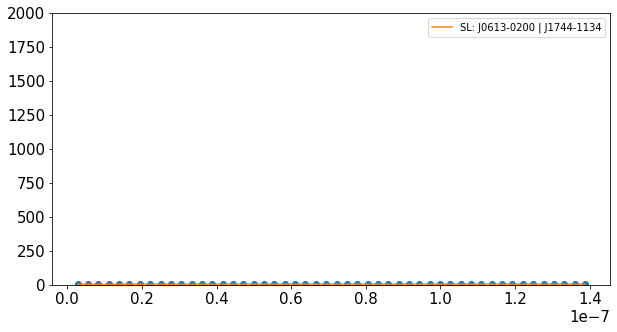

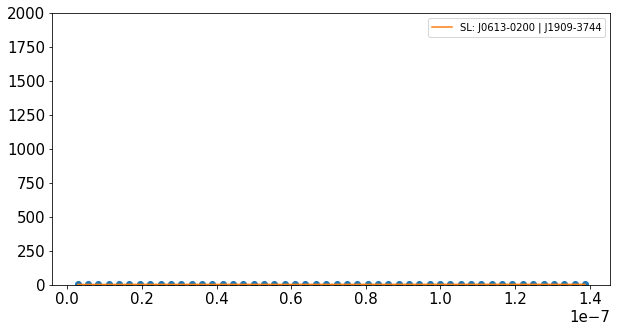

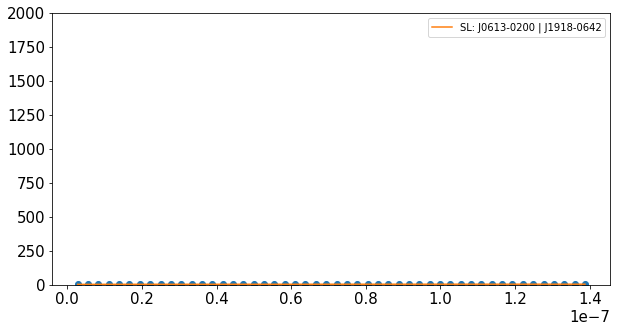

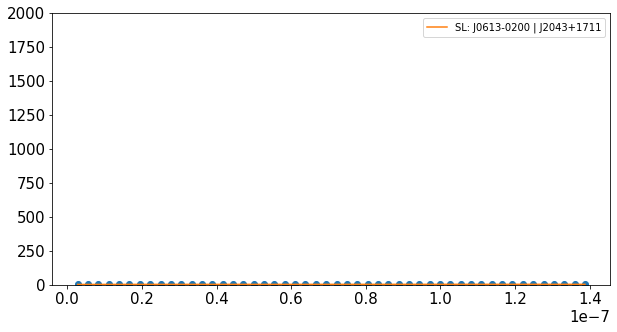

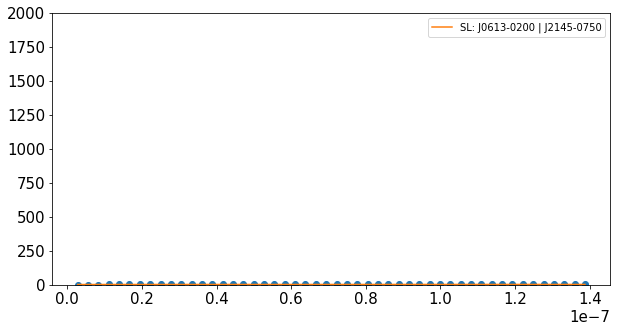

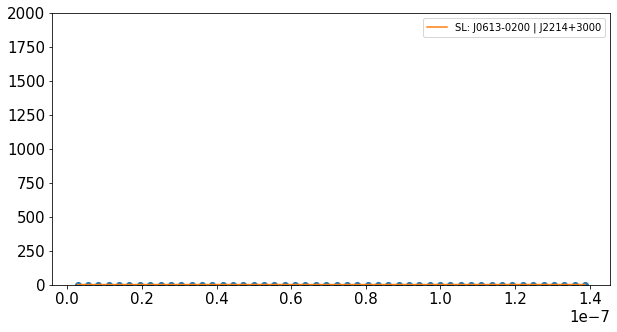

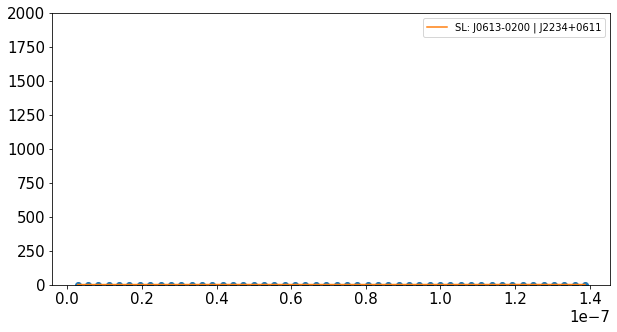

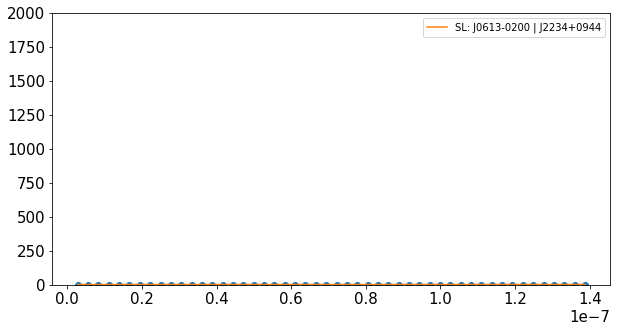

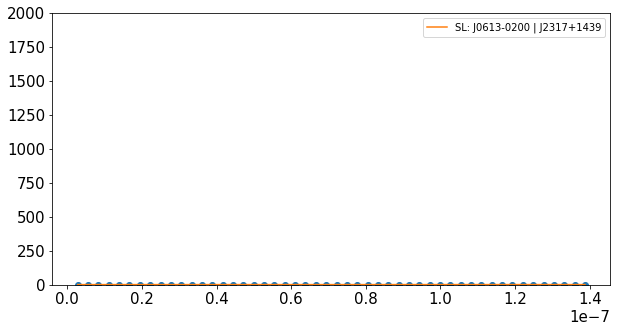

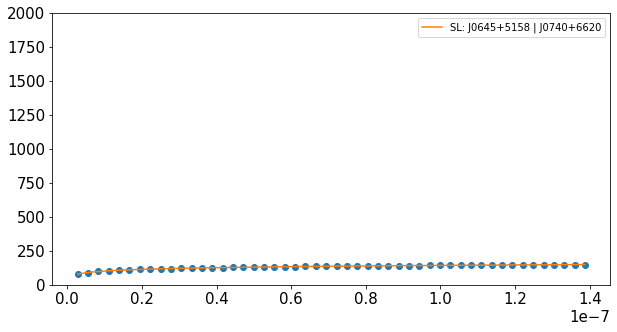

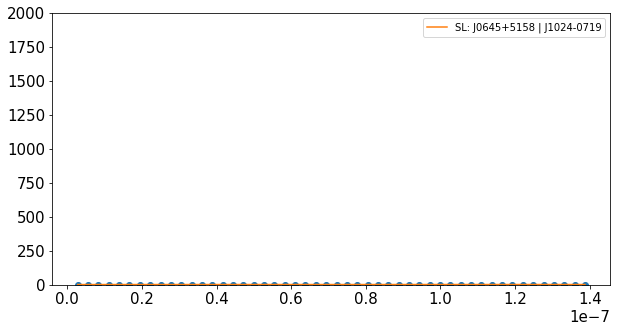

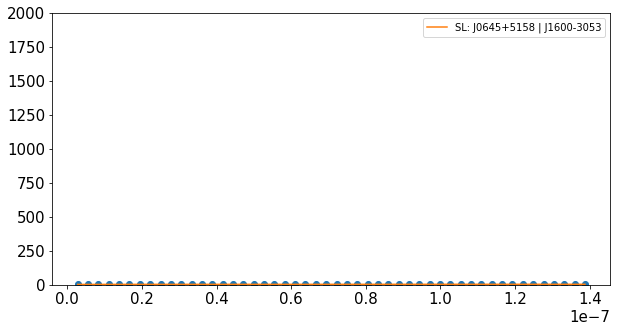

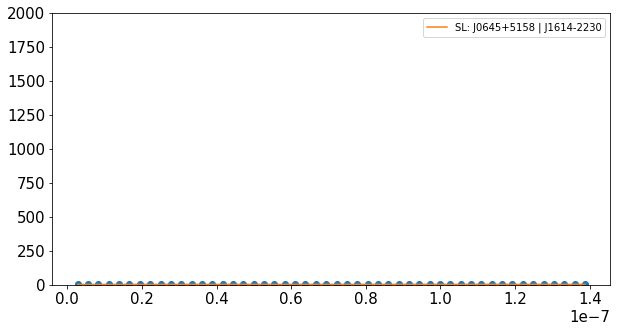

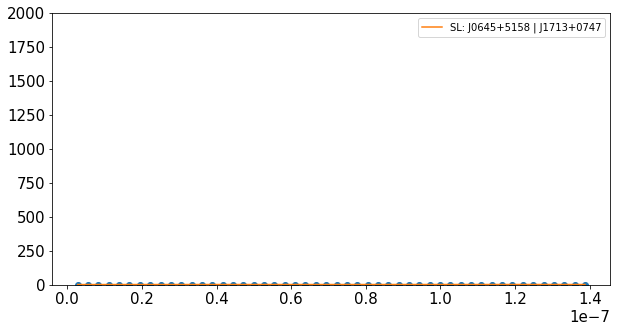

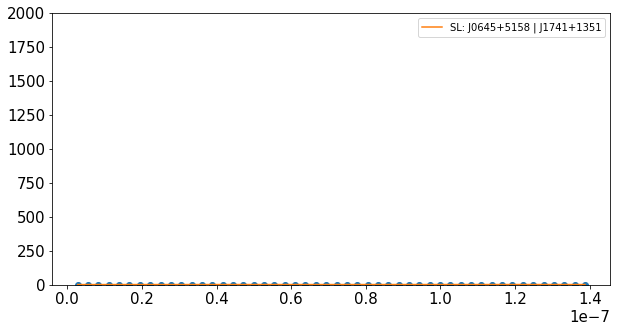

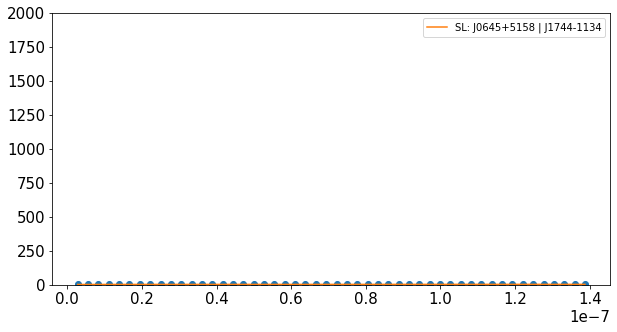

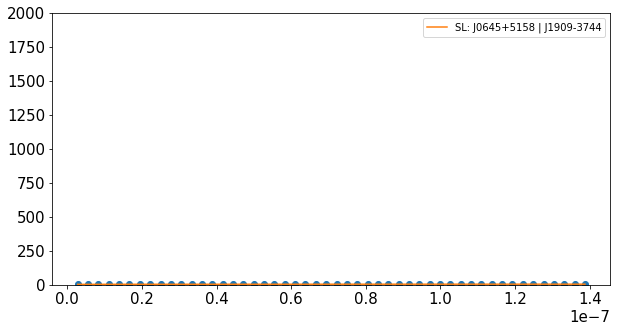

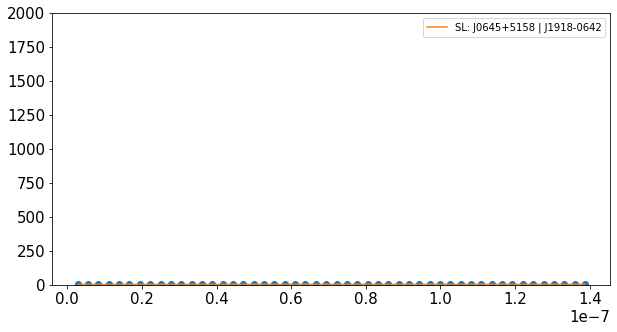

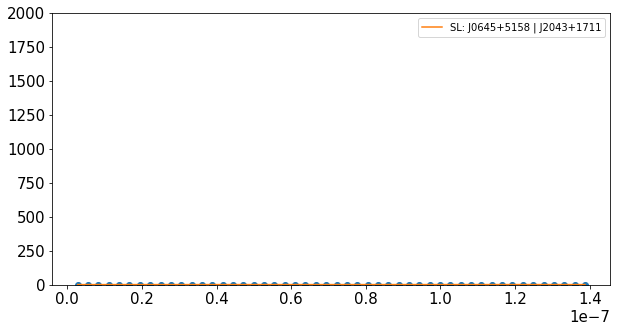

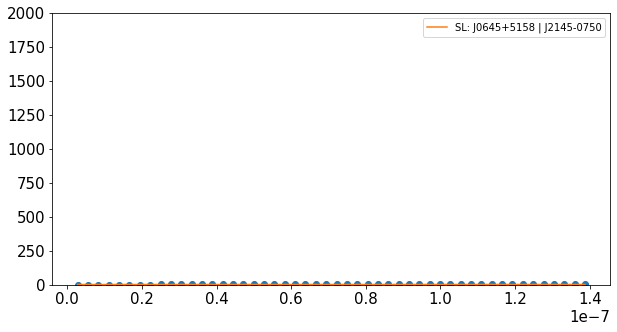

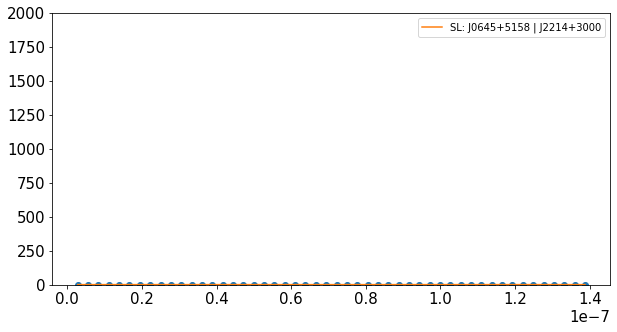

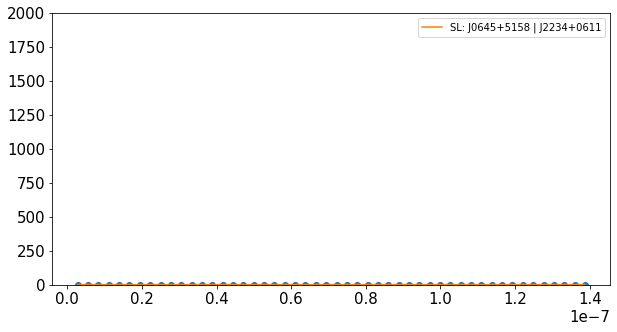

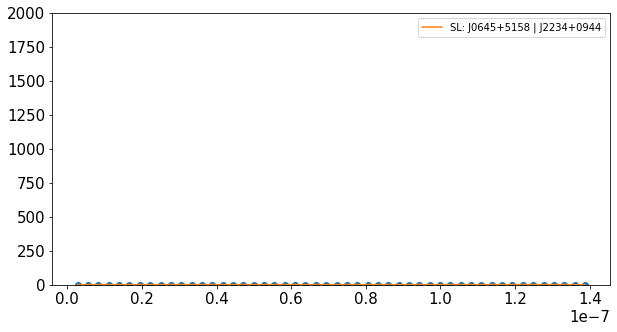

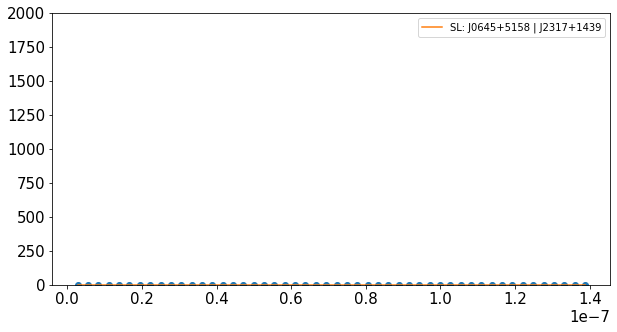

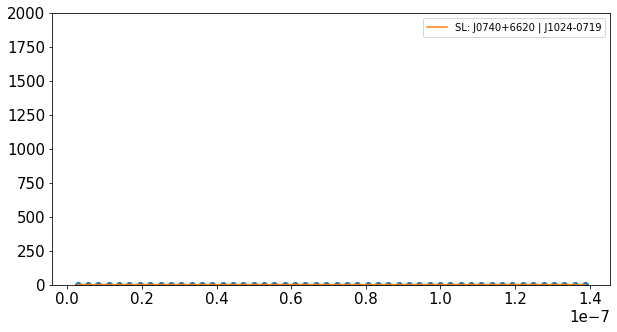

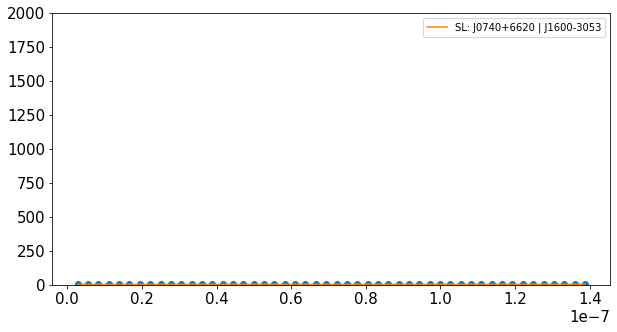

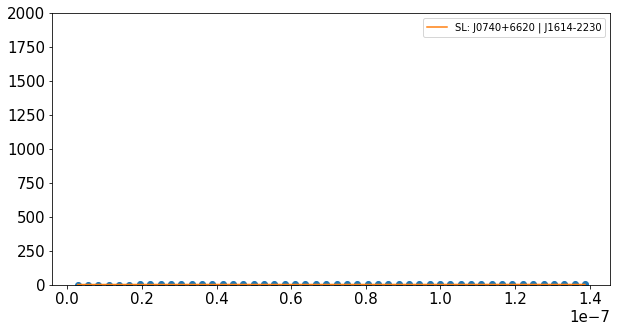

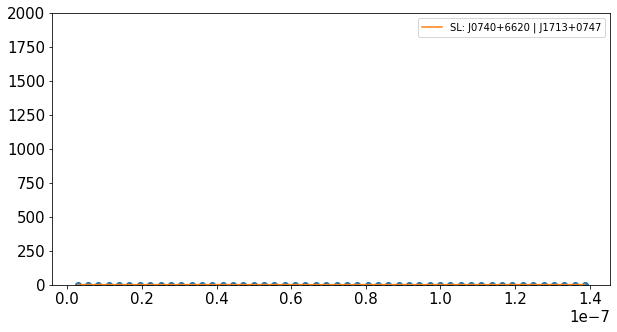

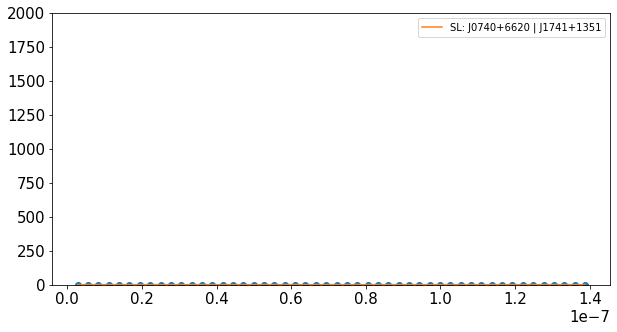

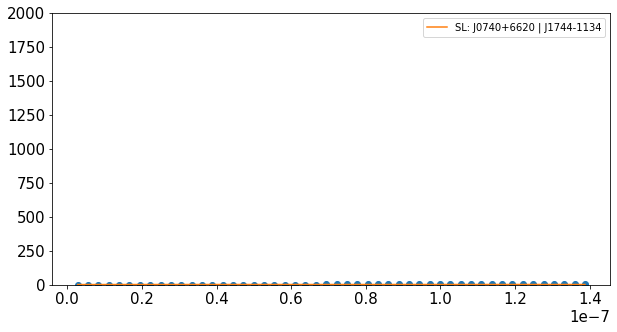

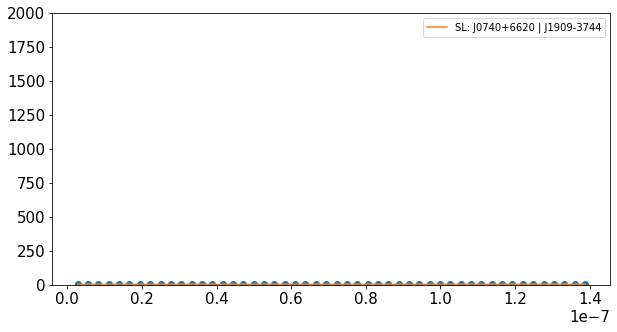

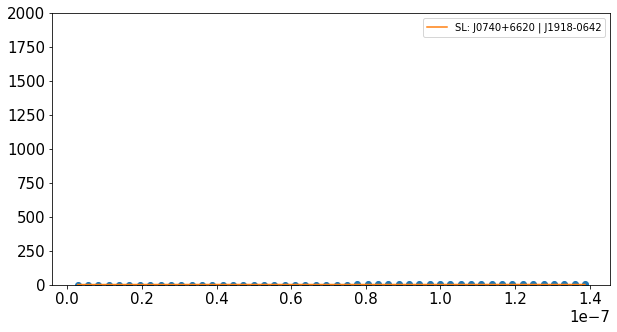

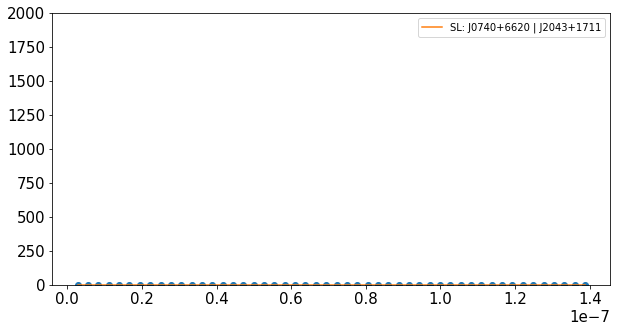

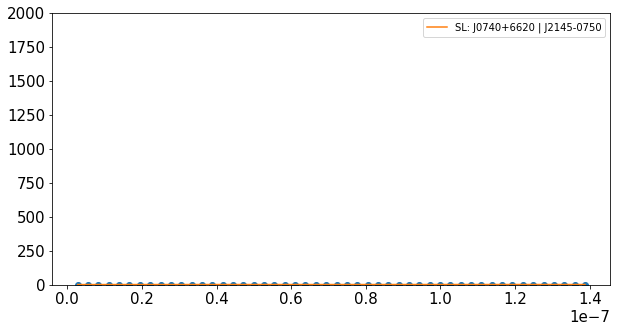

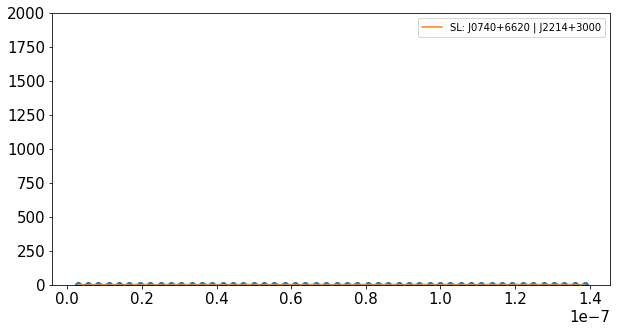

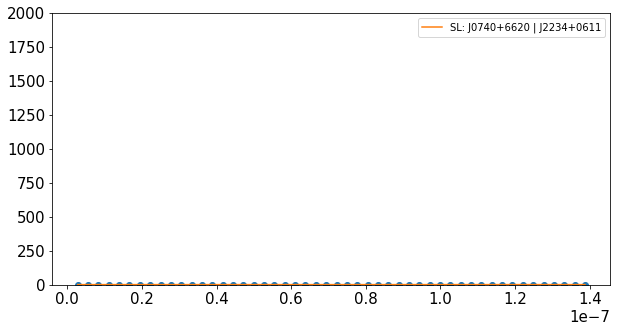

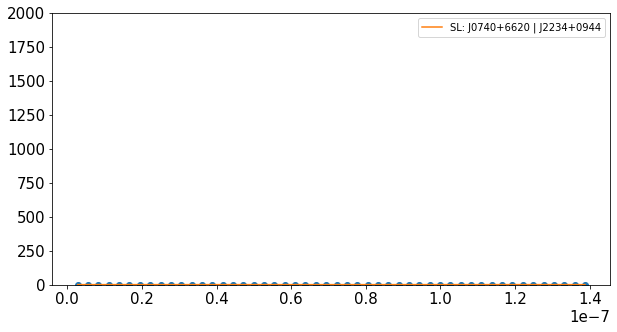

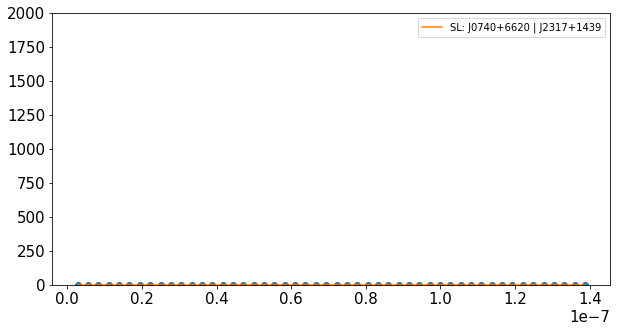

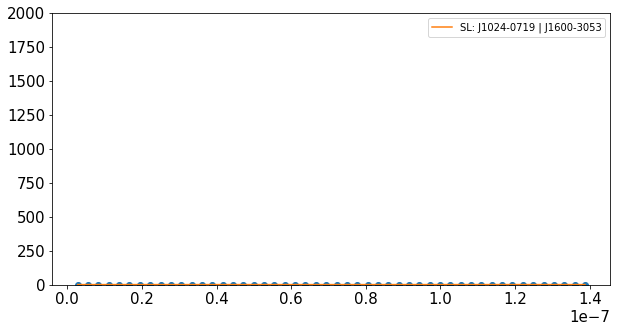

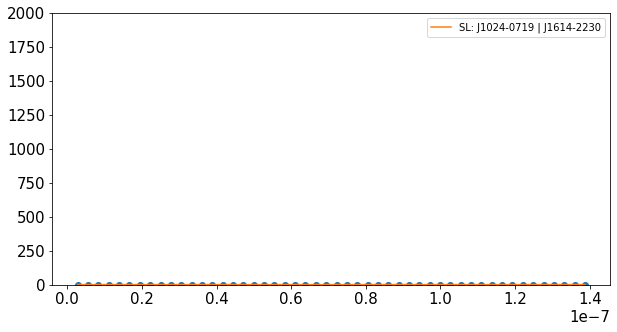

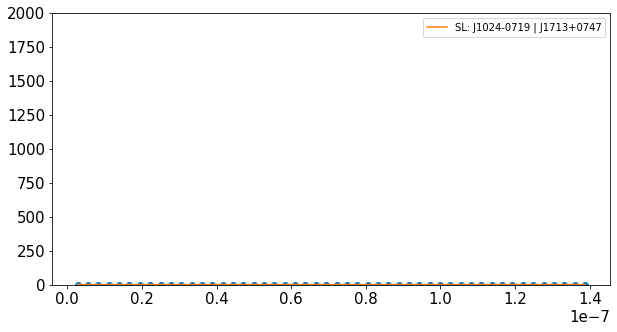

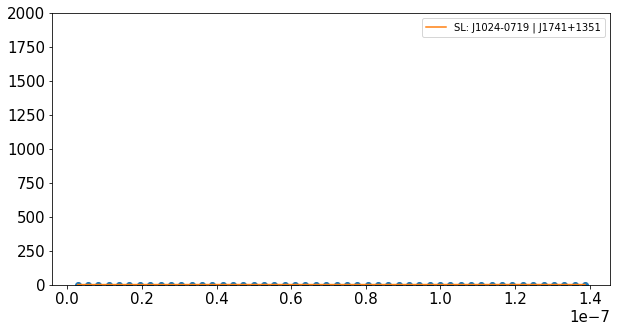

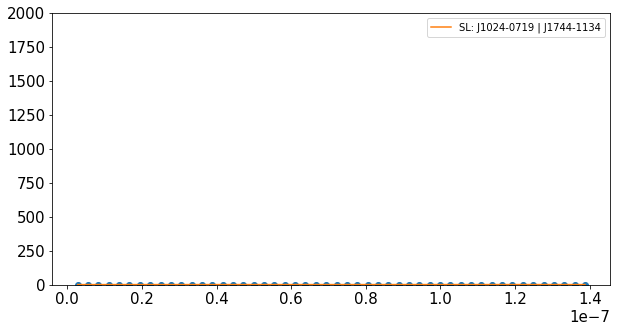

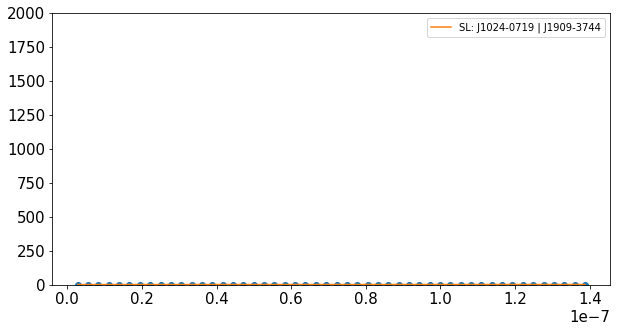

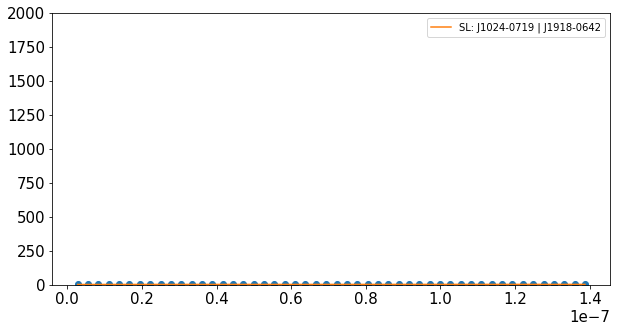

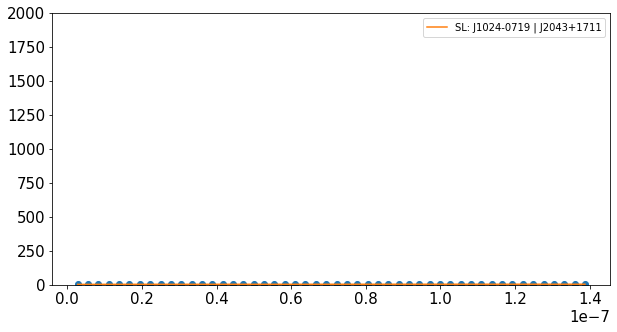

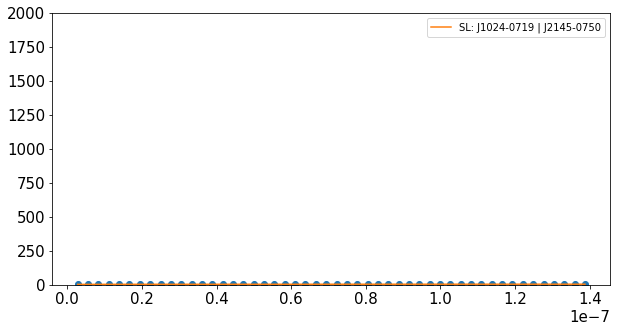

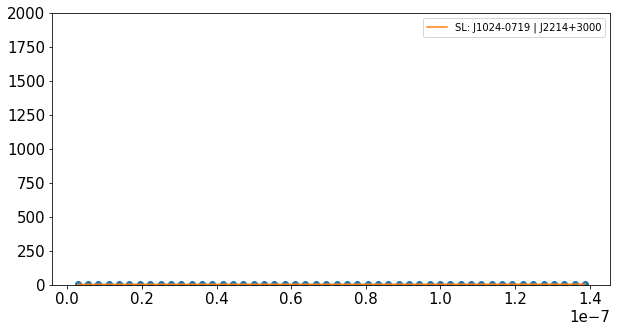

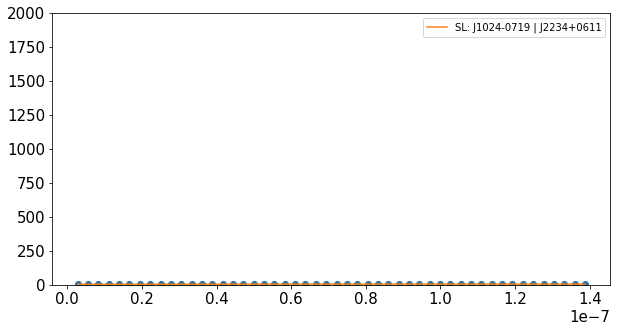

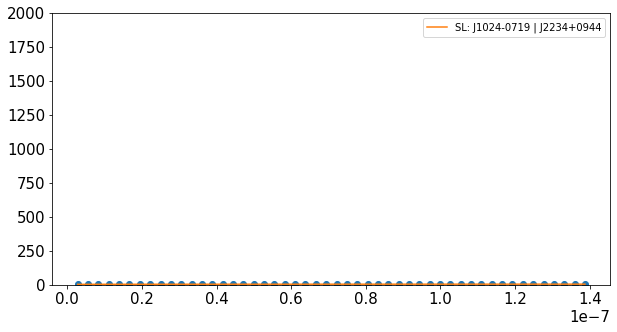

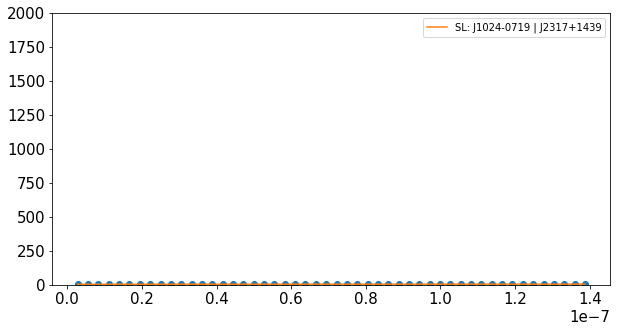

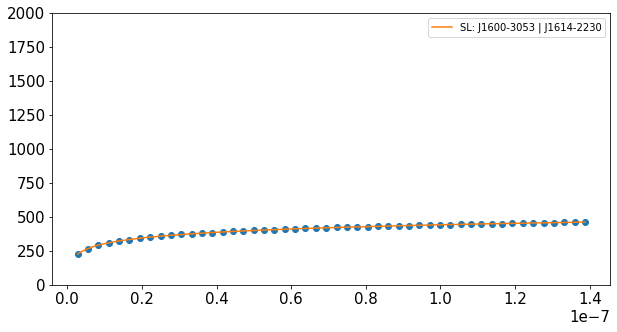

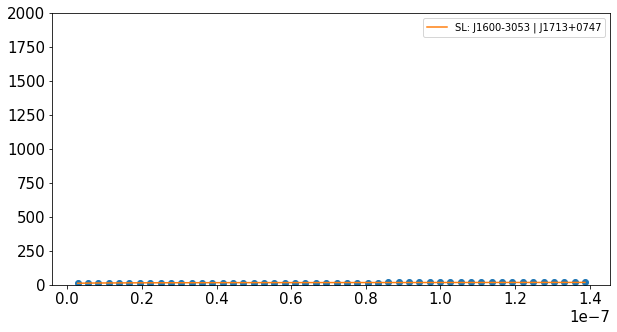

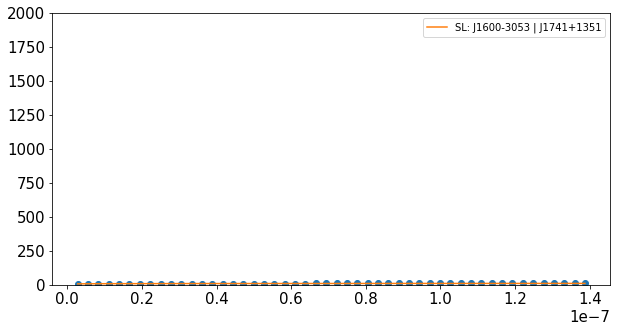

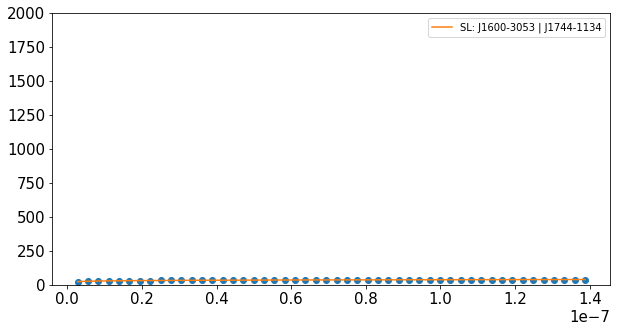

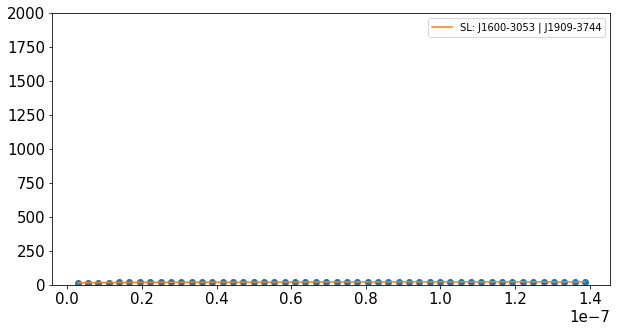

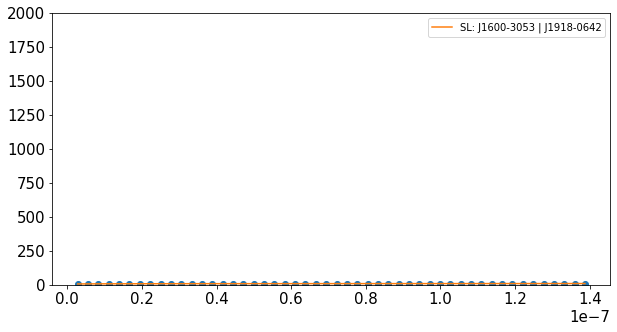

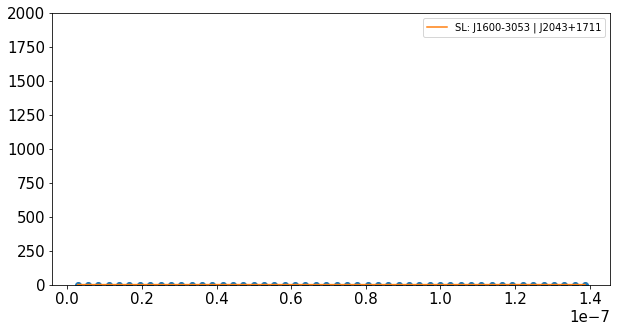

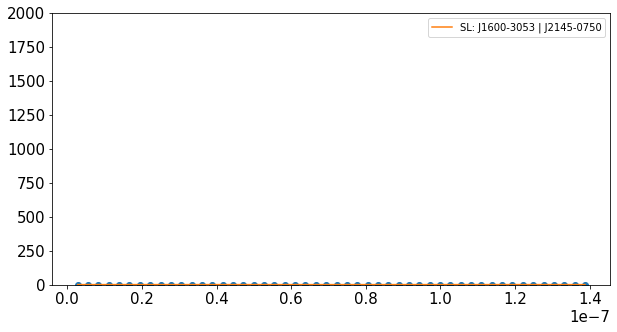

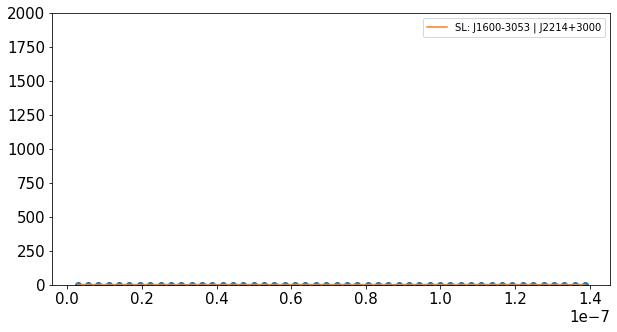

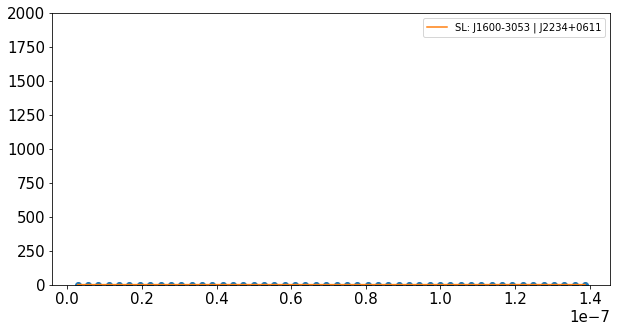

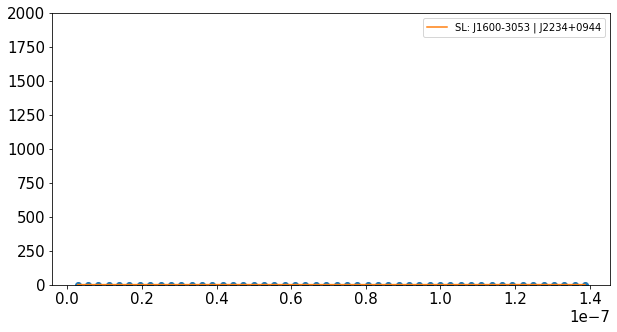

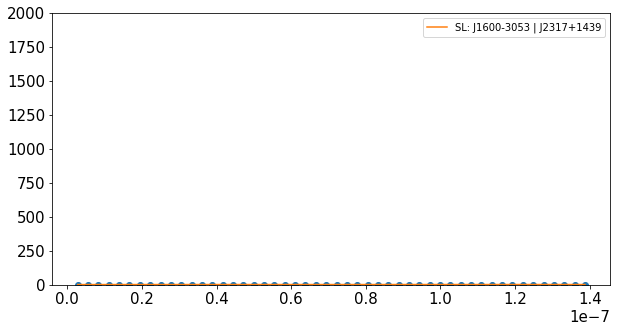

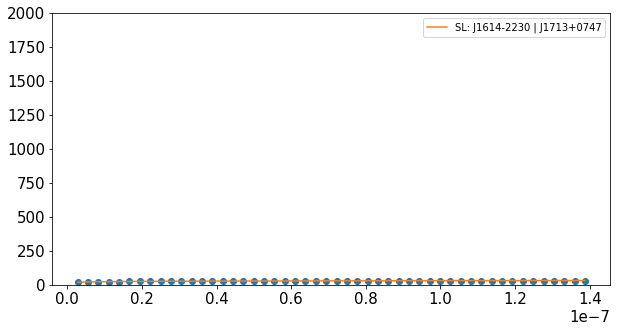

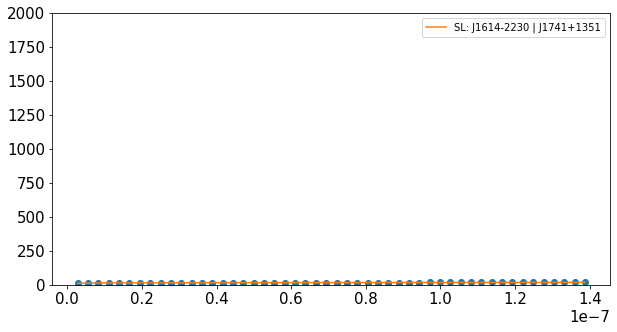

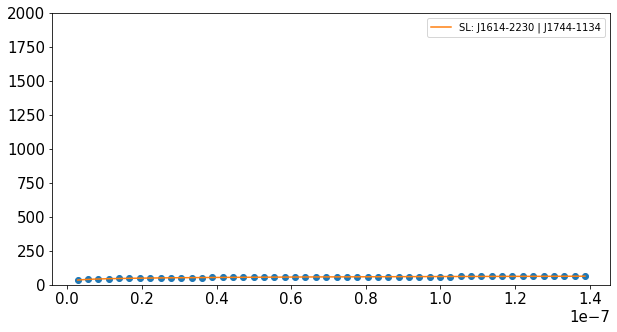

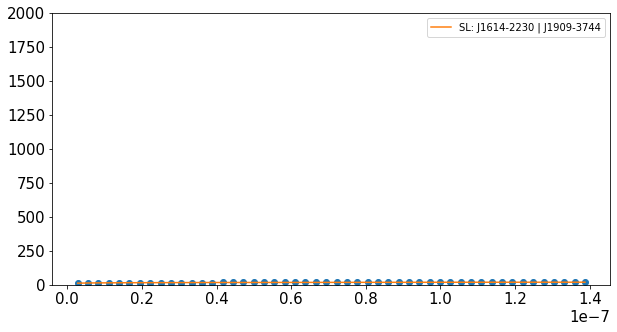

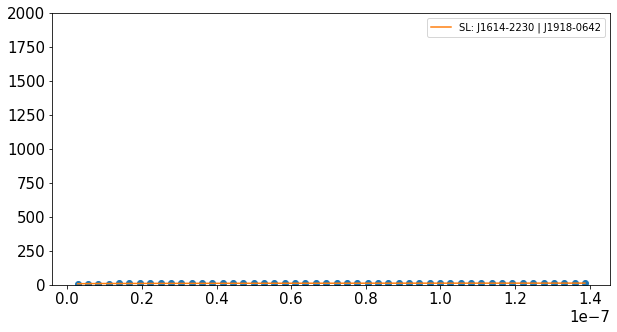

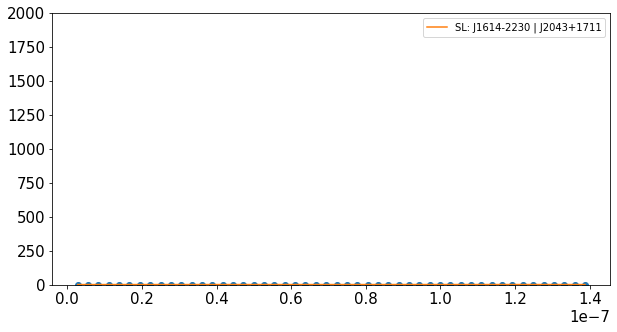

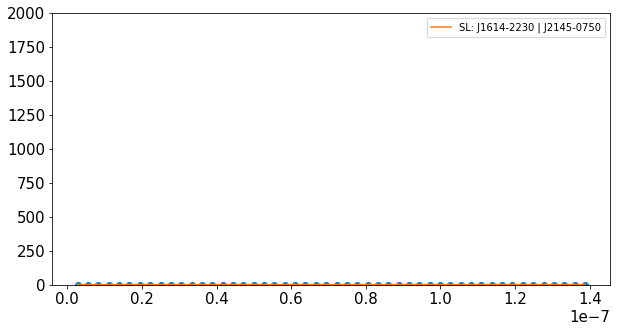

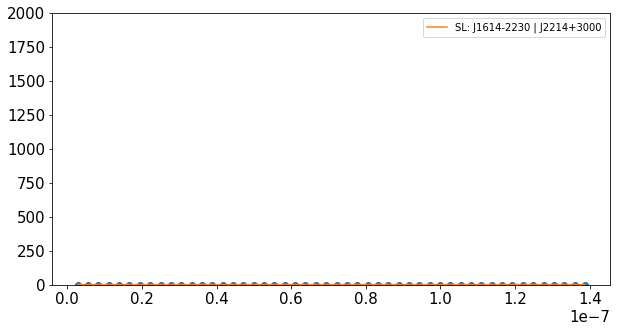

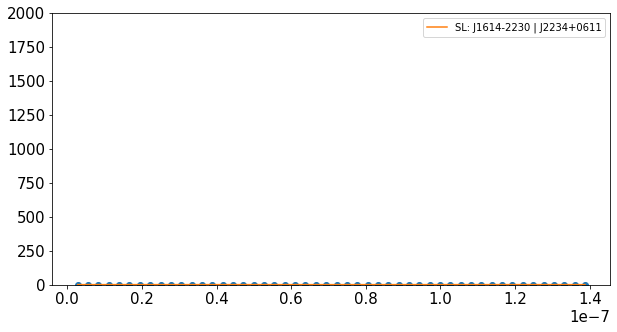

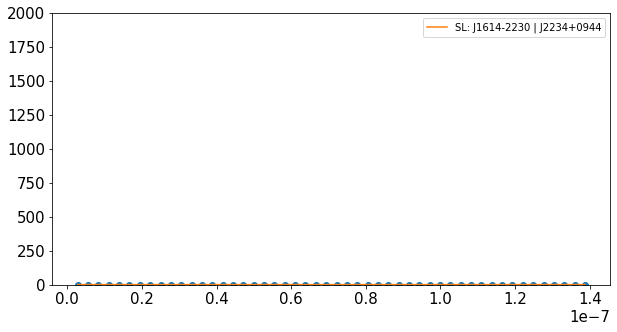

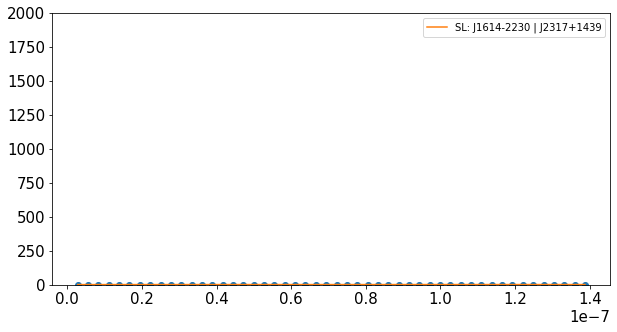

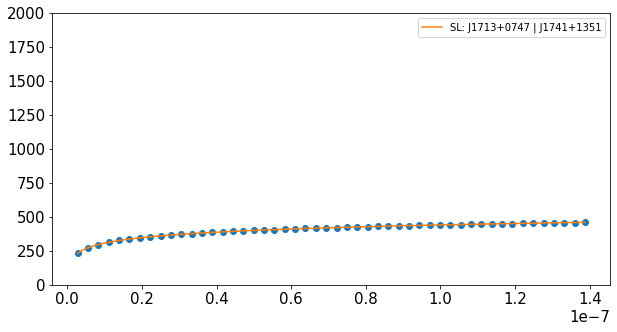

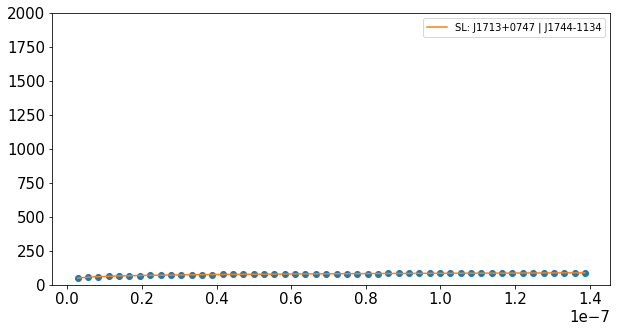

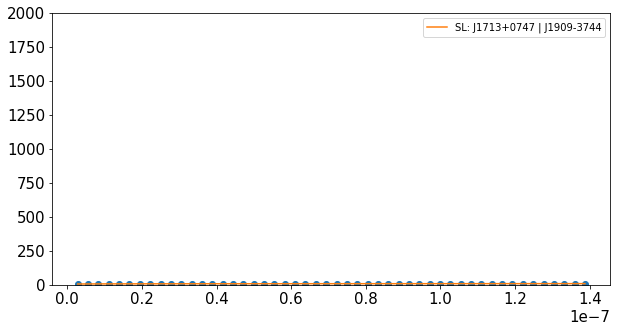

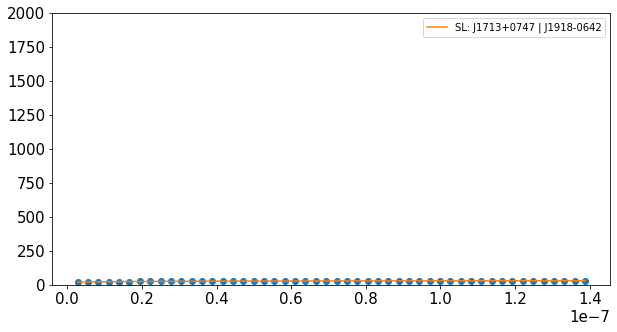

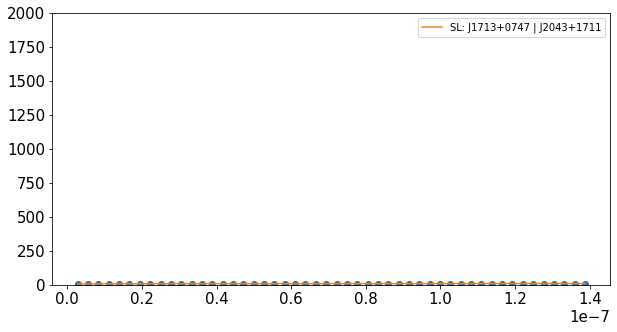

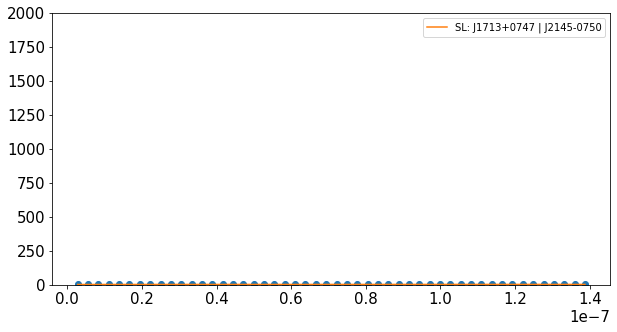

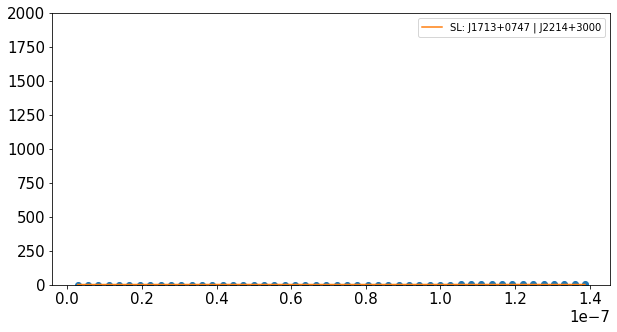

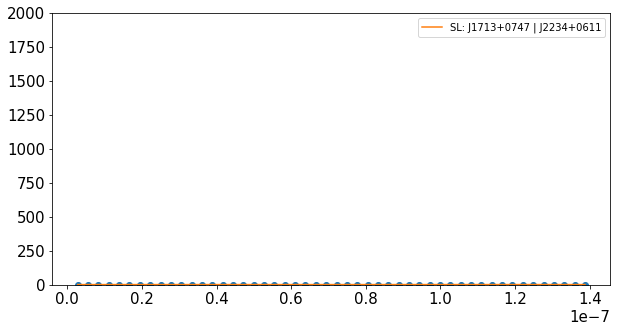

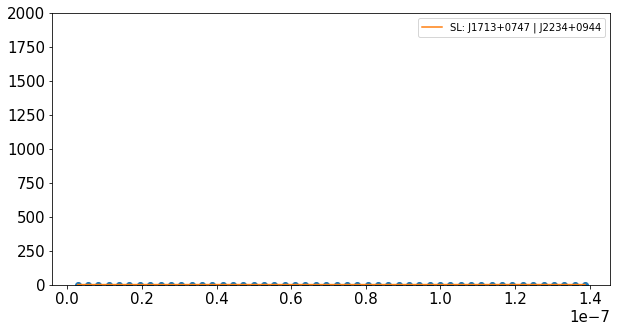

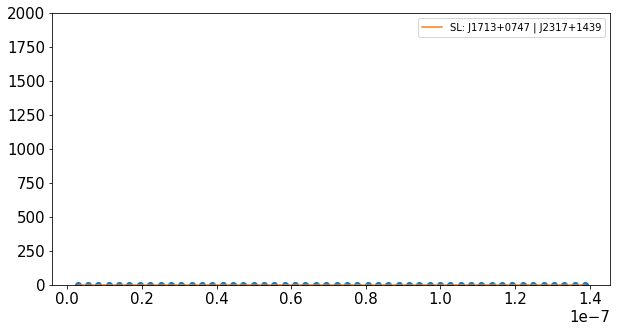

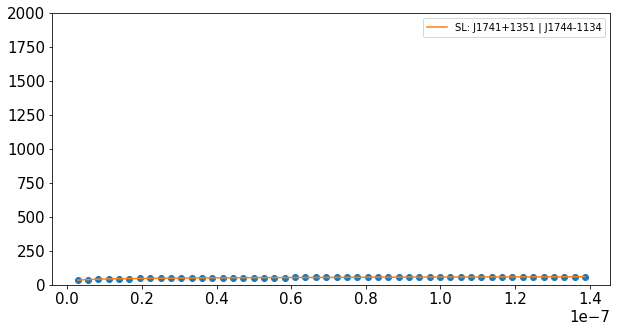

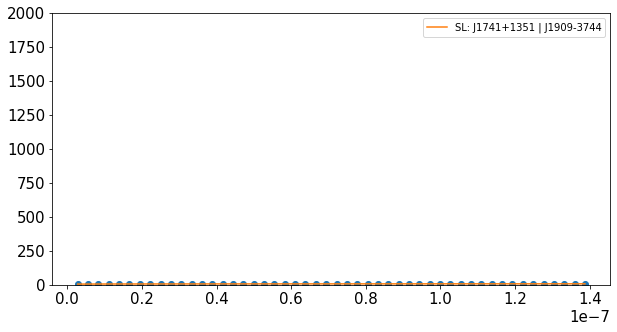

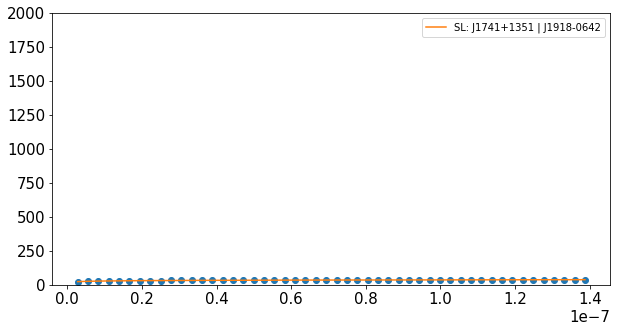

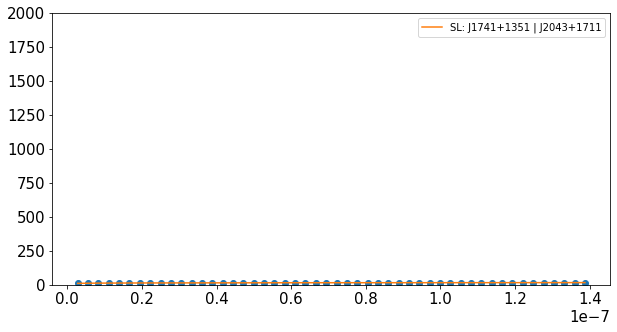

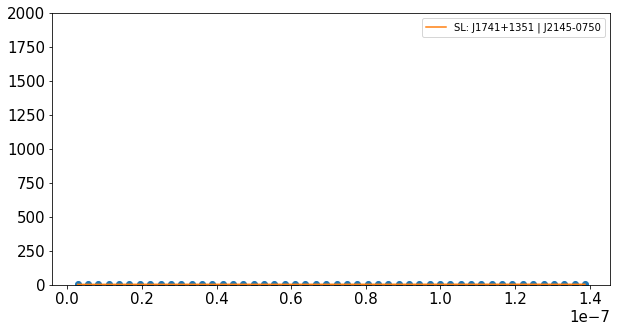

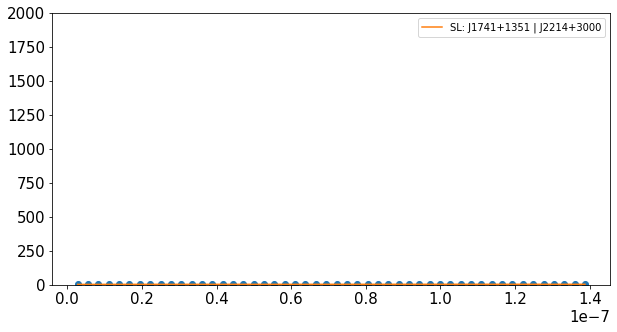

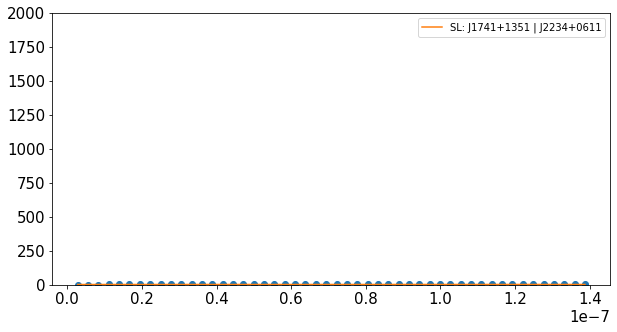

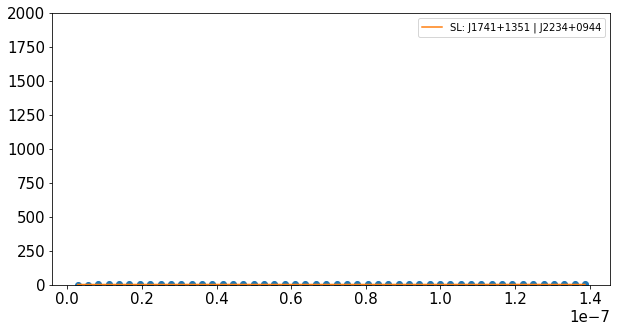

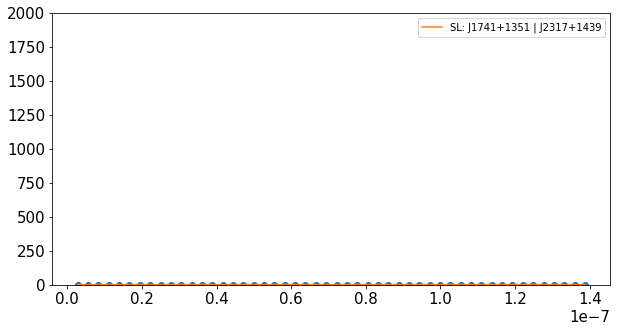

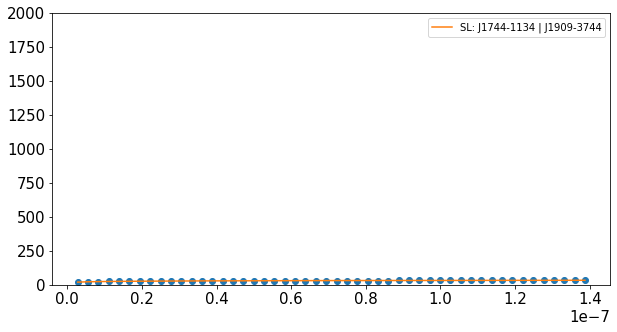

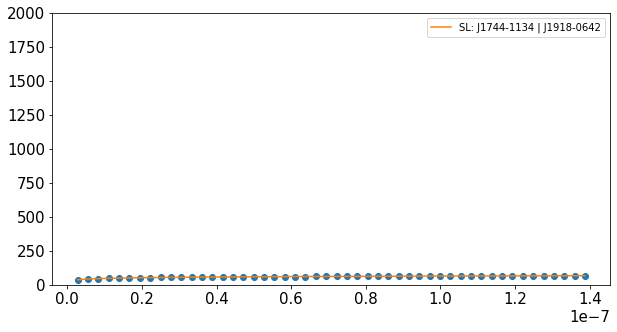

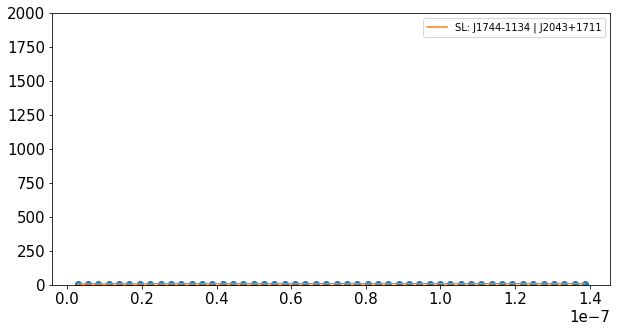

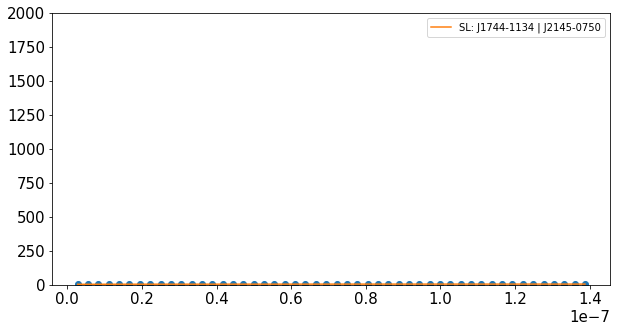

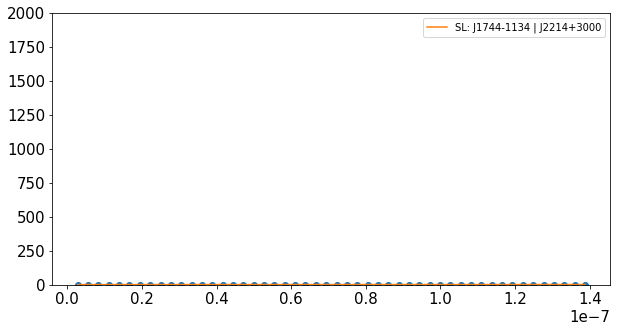

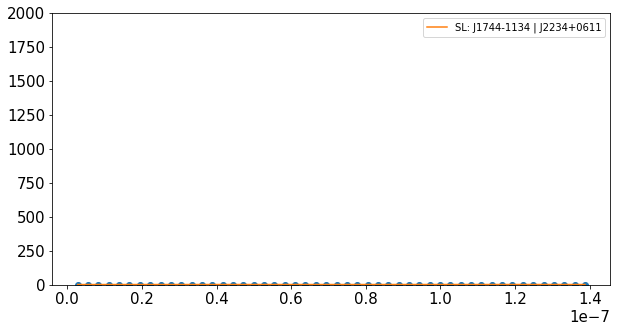

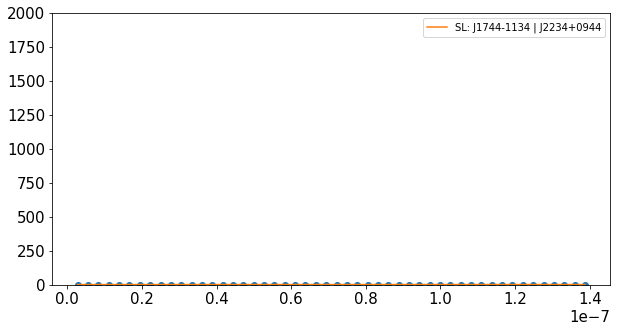

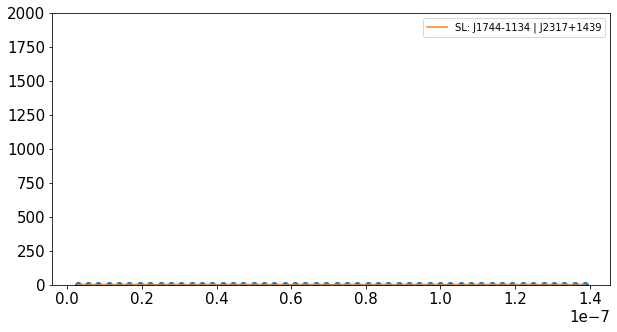

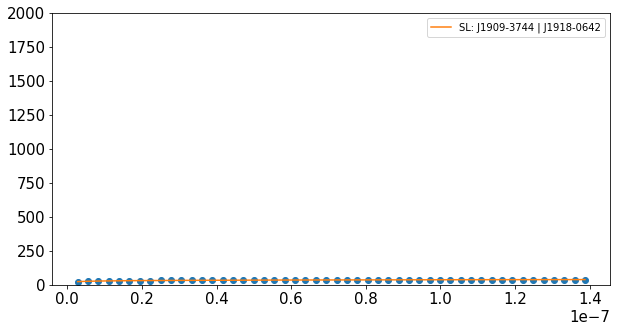

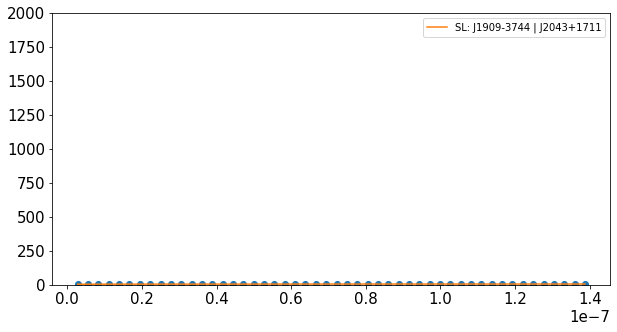

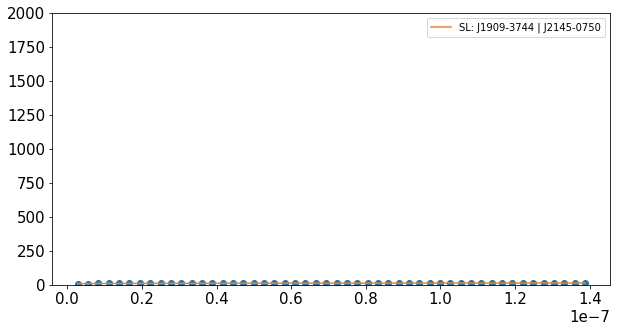

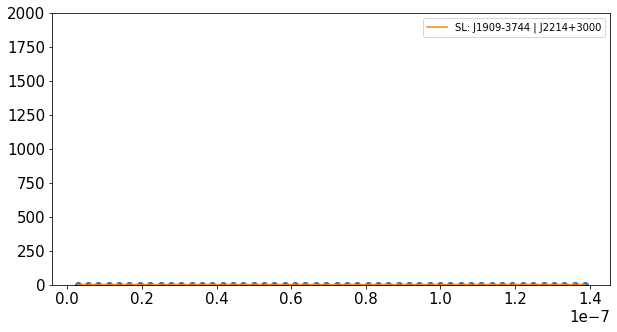

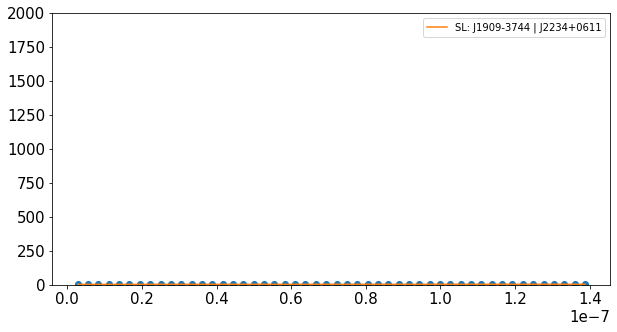

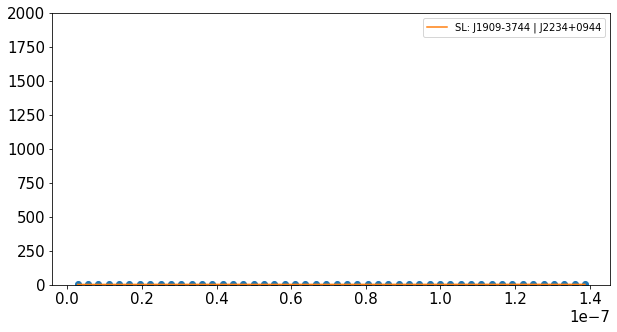

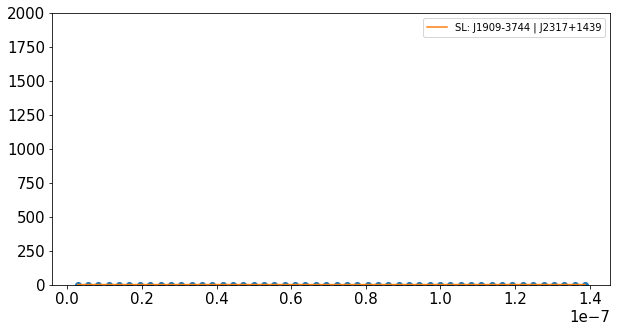

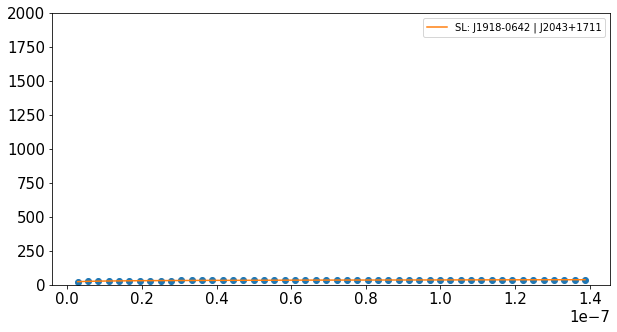

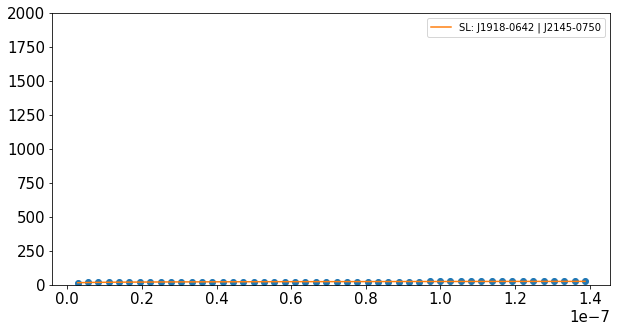

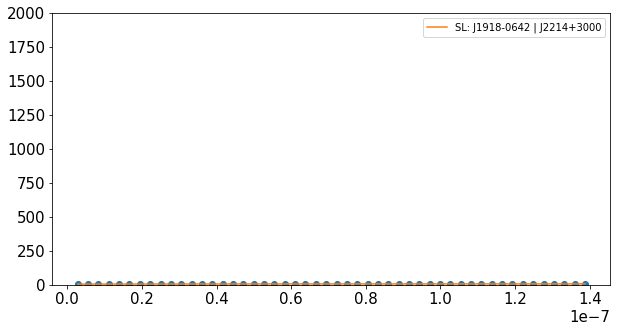

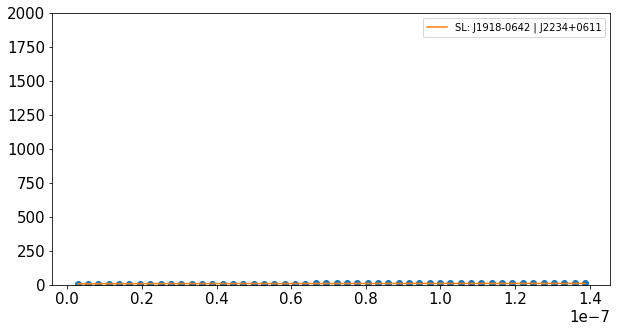

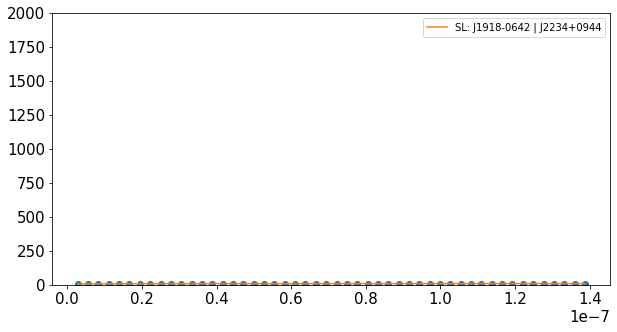

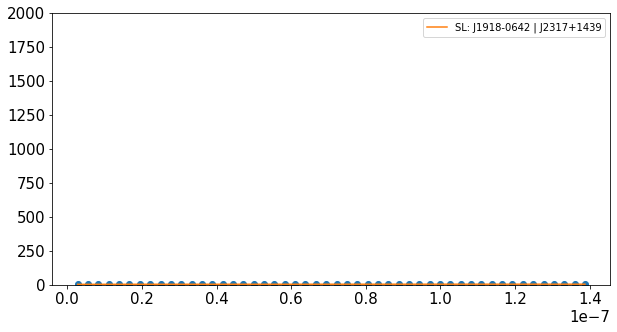

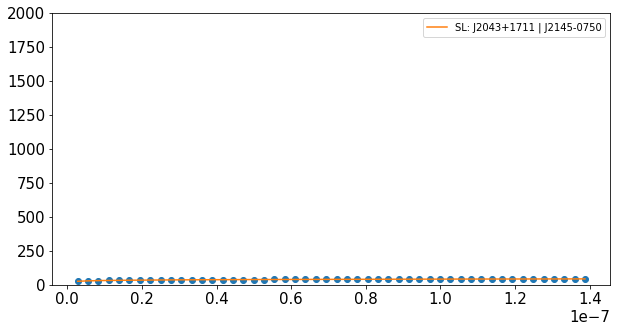

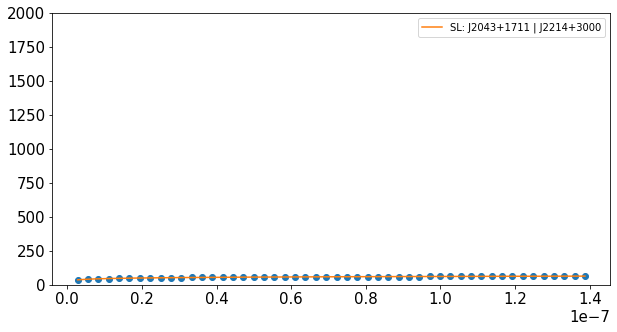

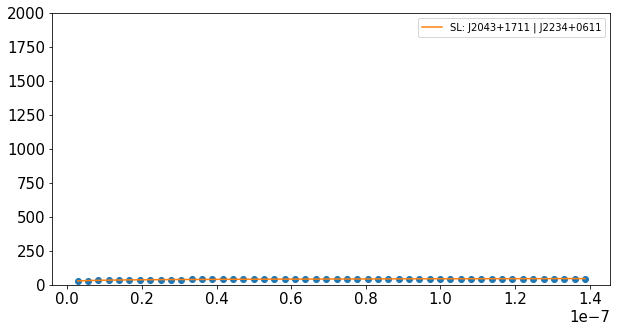

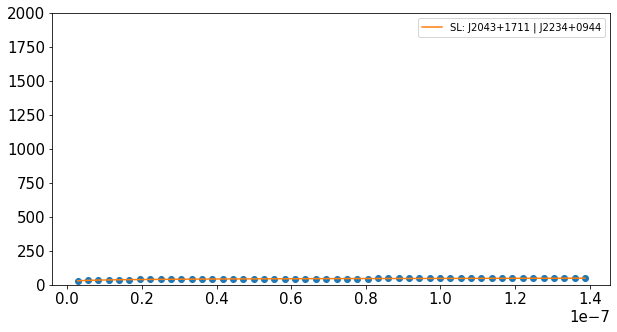

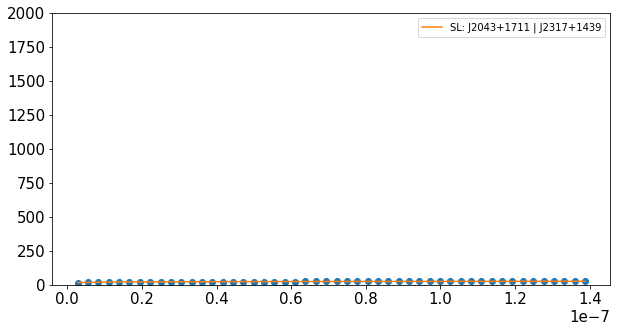

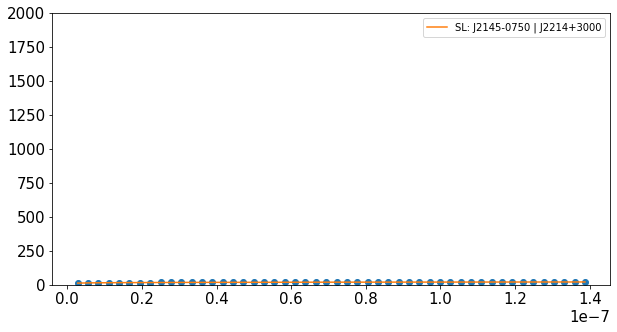

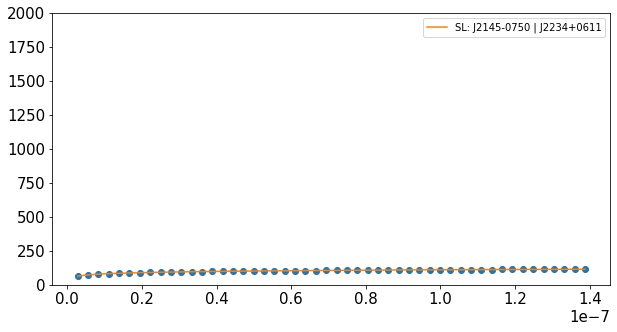

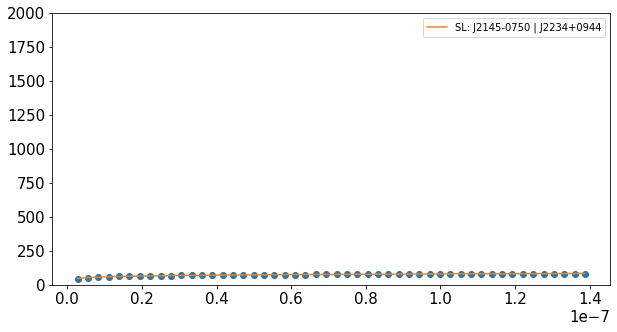

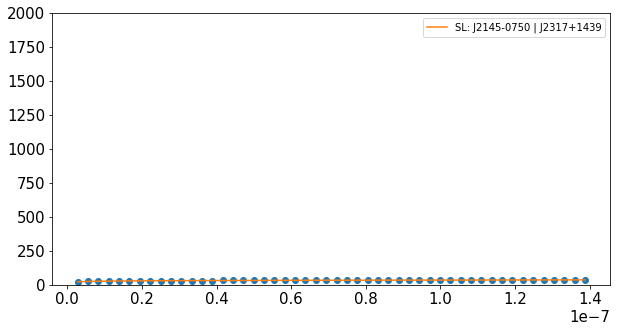

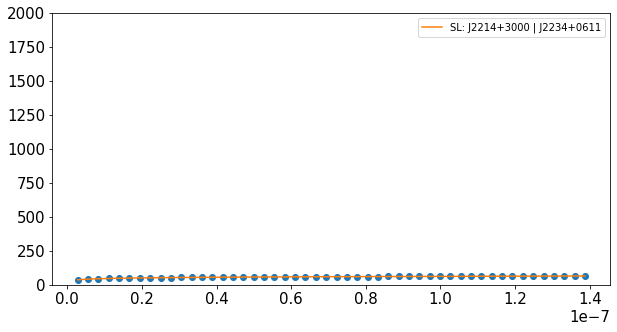

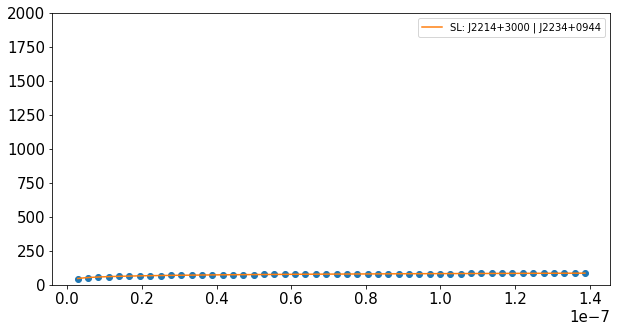

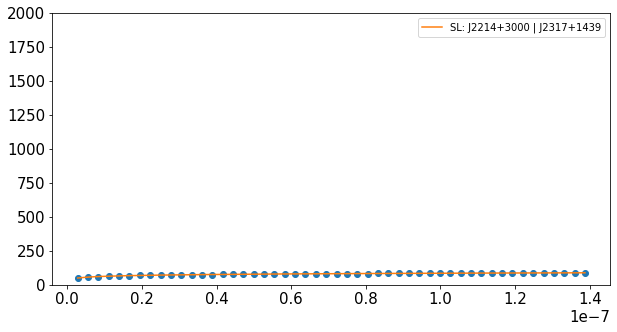

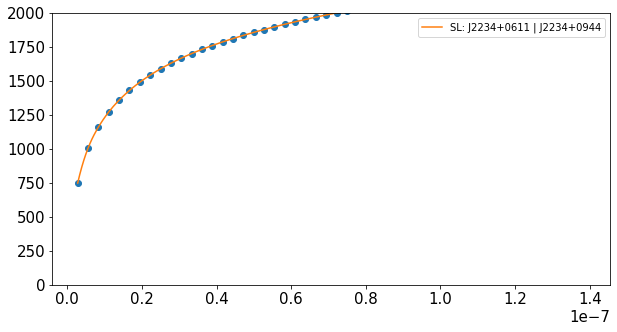

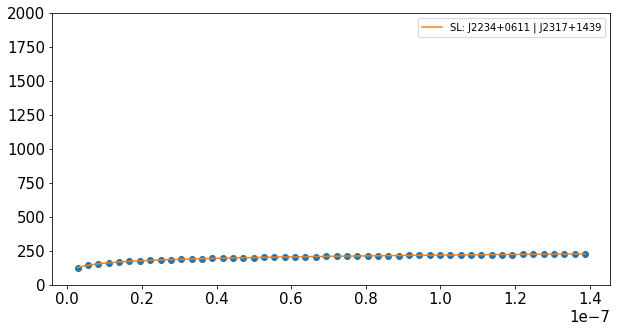

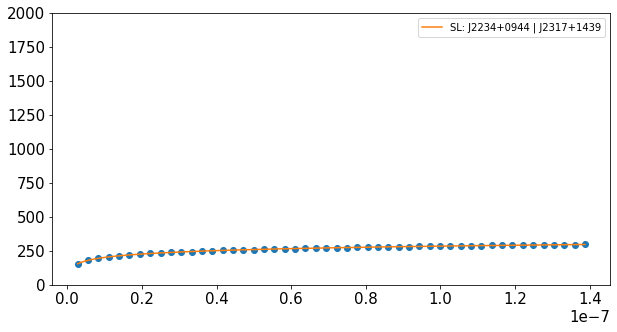

In [10]:
for i in range(0, N_psr):
    for j in range(i+1, N_psr): 
        plotPair("SL", psrs[i], psrs[j])